# Import Data

In [49]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import math

from pytorch_tabnet.tab_model import TabNetClassifier
import torch
import torch.nn as nn
import torch.optim as optimr

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"

with zipfile.ZipFile(zip_path, 'r') as zipped_file:
    csv_file_name = zipped_file.namelist()[0]

    with zipped_file.open(csv_file_name) as csv_file:
        df = pd.read_csv(csv_file)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\hadik\AppData\Local\Temp\ipykernel_19320\798606535.py:1: SyntaxWarning: invalid escape sequence '\C'
  zip_path = "E:\Coding\sem5\DL\ProjekAkhirDL\ALLFLOWMETER_HIKARI2021.zip"


In [51]:
df.head()

Unnamed: 0.1  Unnamed: 0                 uid        originh  originp  \
0             0           0   Cg61Jch3vdz9DBptj  103.255.15.23    13316   
1             1           1   CdRIlqLWdj35Y9vW9  103.255.15.23    13318   
2             2           2   CLzp9Khd0Y09Qkgrg  103.255.15.23    13320   
3             3           3  Cnf1YA4iLB4CSNWB88  103.255.15.23    13322   
4             4           4  C4ZKvv3fpO72EAOsJ6  103.255.15.23    13324   

           responh  responp  flow_duration  fwd_pkts_tot  bwd_pkts_tot  ...  \
0  128.199.242.104      443       2.207588            15            14  ...   
1  128.199.242.104      443      15.624266            15            14  ...   
2  128.199.242.104      443      12.203357            14            13  ...   
3  128.199.242.104      443       9.992448            14            13  ...   
4  128.199.242.104      443       7.780611            14            14  ...   

       idle.min      idle.max      idle.tot      idle.avg  idle.std  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
1  1.534300e+07  1.534300e+07  1.534300e+07  1.534300e+07       0.0   
2  1.196814e+07  1.196814e+07  1.196814e+07  1.196814e+07       0.0   
3  9.759205e+06  9.759205e+06  9.759205e+06  9.759205e+06       0.0   
4  7.545305e+06  7.545305e+06  7.545305e+06  7.545305e+06       0.0   

   fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                 29200                 65160                     0   
1                 29200                 65160                     0   
2                 29200                 65160                     0   
3                 29200                 65160                     0   
4                 29200                 65160                     0   

   traffic_category  Label  
0    Bruteforce-XML      1  
1    Bruteforce-XML      1  
2    Bruteforce-XML      1  
3    Bruteforce-XML      1  
4    Bruteforce-XML      1  

[5 rows x 88 columns]

In [52]:
df = df.drop(labels='Label', axis=1)

# Preprocessing Data

## Label Encoding

In [53]:
encoder = LabelEncoder()

def LabelEncoding(df):
    object_features = df.select_dtypes(include=['object'])
    for col in object_features:
        df[col] = encoder.fit_transform(df[col])
    return df

## Z-Score Standarization

In [54]:
zscore = StandardScaler()

def Standarization(df):
    df_zscore = zscore.fit_transform(df)
    df = pd.DataFrame(df_zscore, columns=df.columns)
    return df

## MinMax Normalization

In [55]:
minmax = MinMaxScaler()

def Normalization(df):
    df_scaled = minmax.fit_transform(df)
    df = pd.DataFrame(df_scaled, columns=df.columns)
    return df

## Execute Preprocessing

In [56]:
def Preprocessing(df):
    df = LabelEncoding(df)
    df = Standarization(df)
    df = Normalization(df)
    return df

In [57]:
df_preprocessed = df.copy()
df_preprocessed = Preprocessing(df)

In [58]:
df.head()

Unnamed: 0.1  Unnamed: 0     uid  originh  originp  responh  responp  \
0             0           0  376469      123    13316     1371      443   
1             1           1  352711      123    13318     1371      443   
2             2           2  196673      123    13320     1371      443   
3             3           3  443997      123    13322     1371      443   
4             4           4   40515      123    13324     1371      443   

   flow_duration  fwd_pkts_tot  bwd_pkts_tot  ...     active.std  \
0       2.207588            15            14  ...       0.000000   
1      15.624266            15            14  ...  158109.181742   
2      12.203357            14            13  ...  125449.251656   
3       9.992448            14            13  ...  123182.931318   
4       7.780611            14            14  ...  126016.885411   

       idle.min      idle.max      idle.tot      idle.avg  idle.std  \
0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.0   
1  1.534300e+07  1.534300e+07  1.534300e+07  1.534300e+07       0.0   
2  1.196814e+07  1.196814e+07  1.196814e+07  1.196814e+07       0.0   
3  9.759205e+06  9.759205e+06  9.759205e+06  9.759205e+06       0.0   
4  7.545305e+06  7.545305e+06  7.545305e+06  7.545305e+06       0.0   

   fwd_init_window_size  bwd_init_window_size  fwd_last_window_size  \
0                 29200                 65160                     0   
1                 29200                 65160                     0   
2                 29200                 65160                     0   
3                 29200                 65160                     0   
4                 29200                 65160                     0   

   traffic_category  
0                 3  
1                 3  
2                 3  
3                 3  
4                 3  

[5 rows x 87 columns]

In [59]:
df_preprocessed.head()

Unnamed: 0.1  Unnamed: 0       uid   originh   originp   responh   responp  \
0      0.000000    0.000000  0.677984  0.042443  0.202934  0.171589  0.006761   
1      0.000002    0.000003  0.635198  0.042443  0.202964  0.171589  0.006761   
2      0.000004    0.000006  0.354189  0.042443  0.202995  0.171589  0.006761   
3      0.000005    0.000009  0.799596  0.042443  0.203025  0.171589  0.006761   
4      0.000007    0.000011  0.072964  0.042443  0.203056  0.171589  0.006761   

   flow_duration  fwd_pkts_tot  bwd_pkts_tot  ...  active.std  idle.min  \
0       0.000127      0.000046      0.000043  ...    0.000000  0.000000   
1       0.000898      0.000046      0.000043  ...    0.000029  0.051177   
2       0.000702      0.000043      0.000040  ...    0.000023  0.039920   
3       0.000575      0.000043      0.000040  ...    0.000023  0.032552   
4       0.000447      0.000043      0.000043  ...    0.000023  0.025167   

   idle.max  idle.tot  idle.avg  idle.std  fwd_init_window_size  \
0  0.000000  0.000000  0.000000       0.0              0.445563   
1  0.051177  0.000882  0.051177       0.0              0.445563   
2  0.039920  0.000688  0.039920       0.0              0.445563   
3  0.032552  0.000561  0.032552       0.0              0.445563   
4  0.025167  0.000434  0.025167       0.0              0.445563   

   bwd_init_window_size  fwd_last_window_size  traffic_category  
0              0.994278                   0.0               0.6  
1              0.994278                   0.0               0.6  
2              0.994278                   0.0               0.6  
3              0.994278                   0.0               0.6  
4              0.994278                   0.0               0.6  

[5 rows x 87 columns]

# Analisis Data

## Label meaning

0: Background,

1: Benign,

2: Bruteforce, 

3: Bruteforce-XML, 

4: Probing, 

5: XMRIGCC CryptoMiner

## Data Example

Example of 1 row of data

0
0
Cg61Jch3vdz9DBptj
103.255.15.23
13316
128.199.242.104
443
2.207588
15
14
6
6
6.794746
6.341763
13.136509
0.933333
464
20
40
492
32
44
2
2
2
6
5
26
0
0
0
0
0.0
742.0
1826.0
121.733333
220.736581
0.0
1448.0
5025.0
358.928571
552.23984
0.0
1448.0
6851.0
236.241379
424.859275
18.119812
1963762.044907
2207602.977753
157685.926982
520505.22679
7.867813
2032928.943634
2177949.905396
167534.608107
560626.711841
7.867813
1963762.044907
2207602.977753
78842.963491
369637.838843
3103.387105
7.5
7.0
913.0
2512.5
0.0
0.0
0.0
0.0
0.0
0.0
2207602.977753
2207602.977753
2207602.977753
2207602.977753
0.0
0.0
0.0
0.0
0.0
0.0
29200
65160
0
Bruteforce-XML
1

## Distribusi class setiap fitur

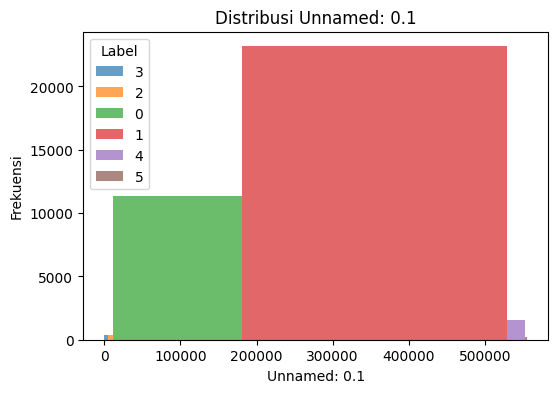

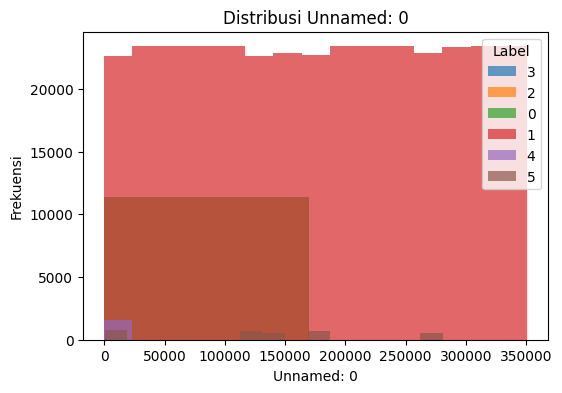

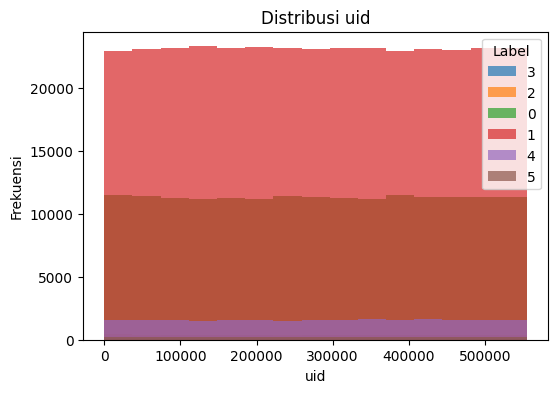

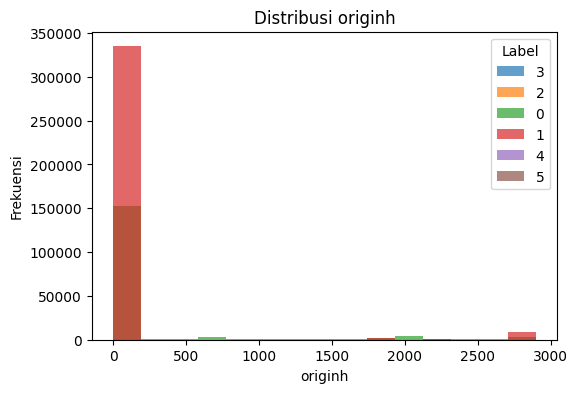

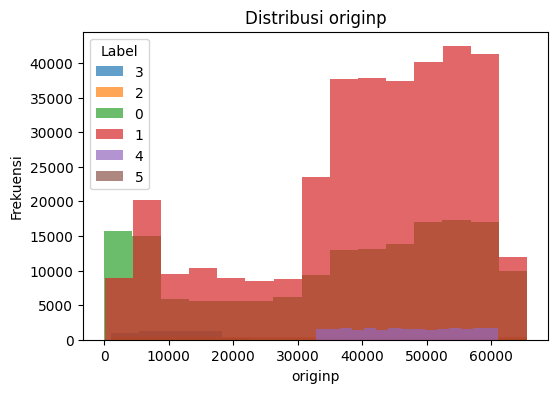

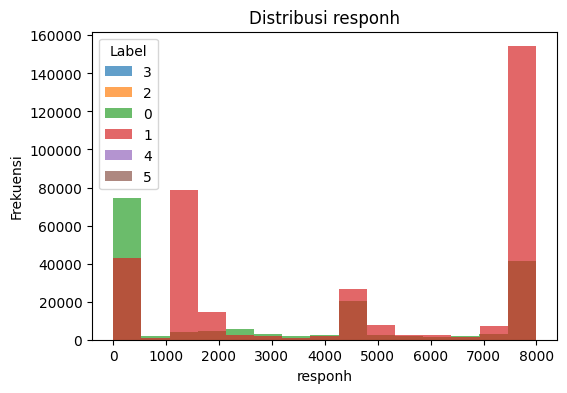

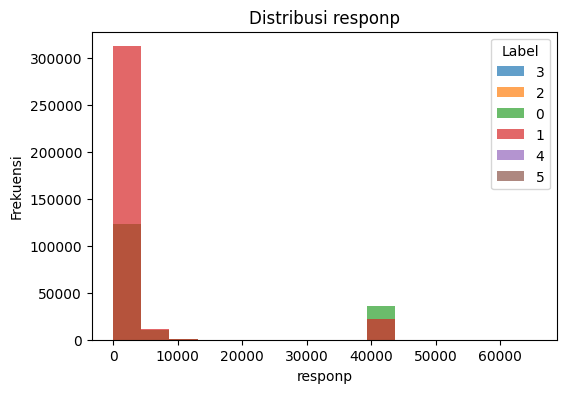

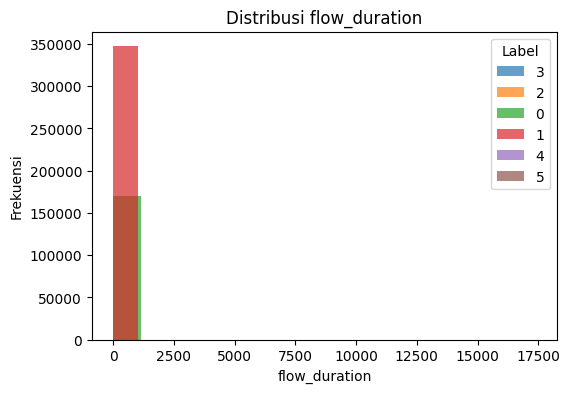

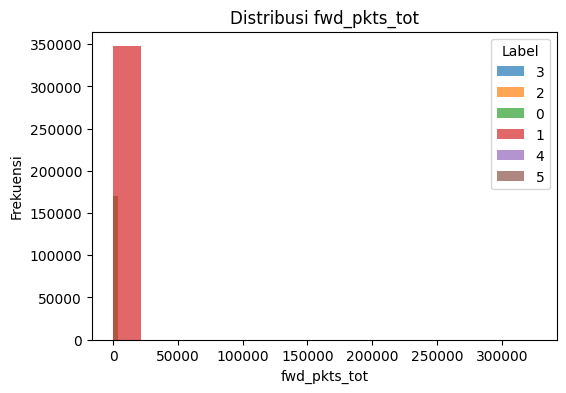

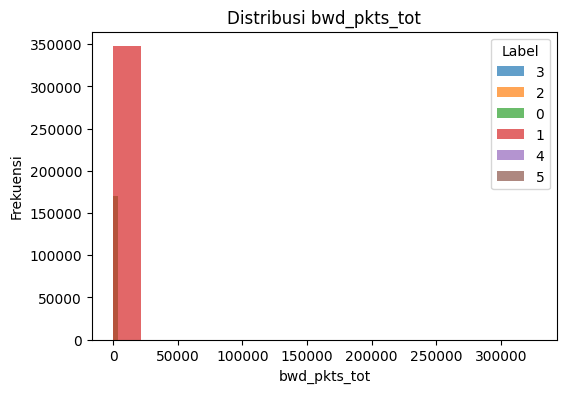

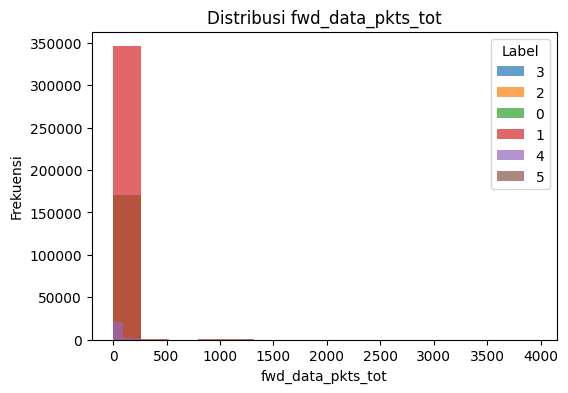

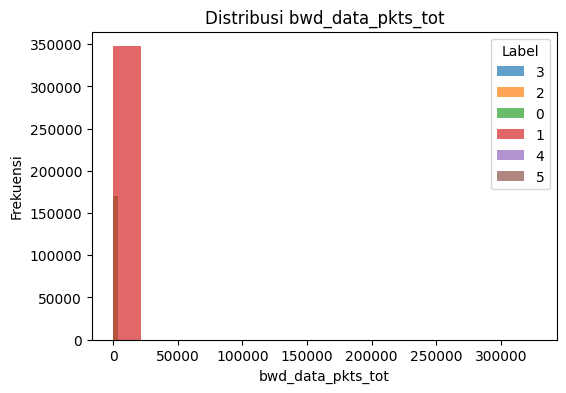

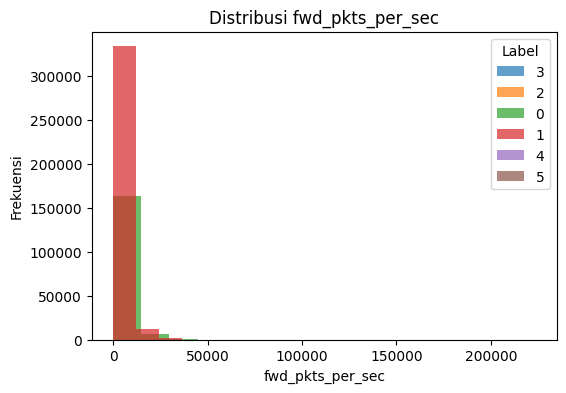

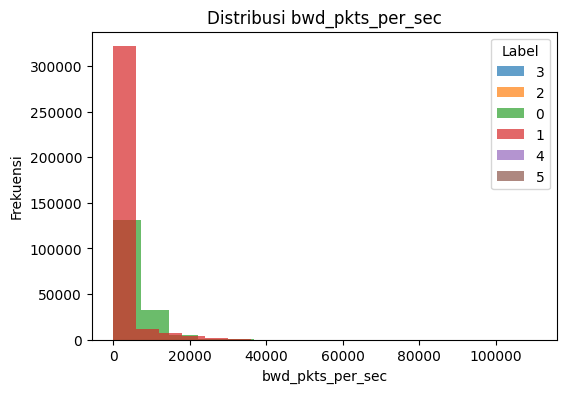

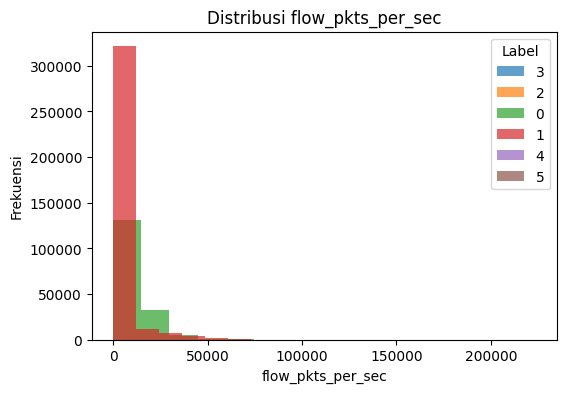

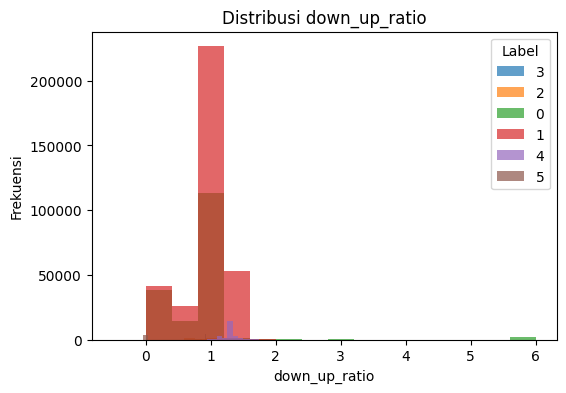

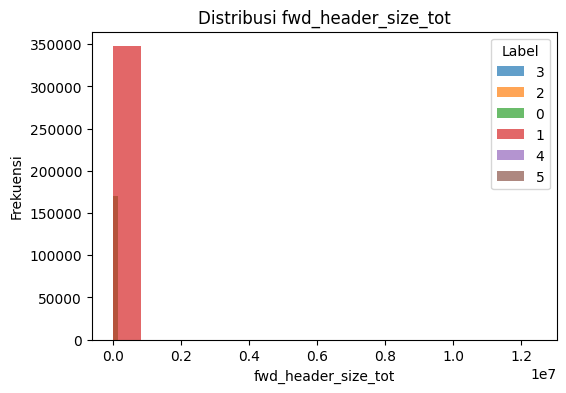

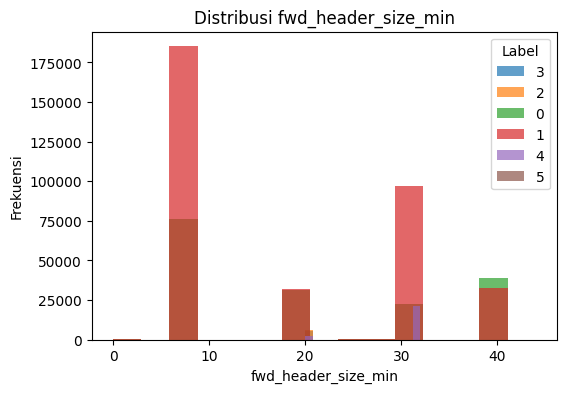

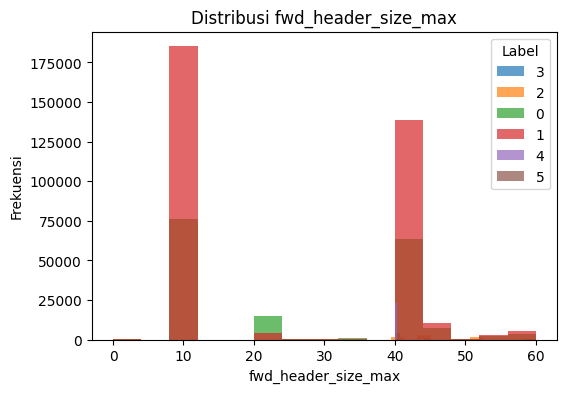

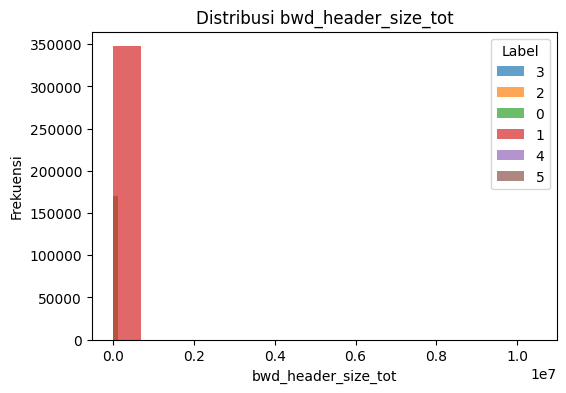

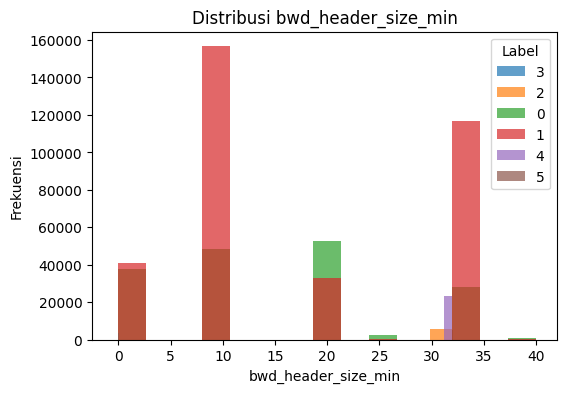

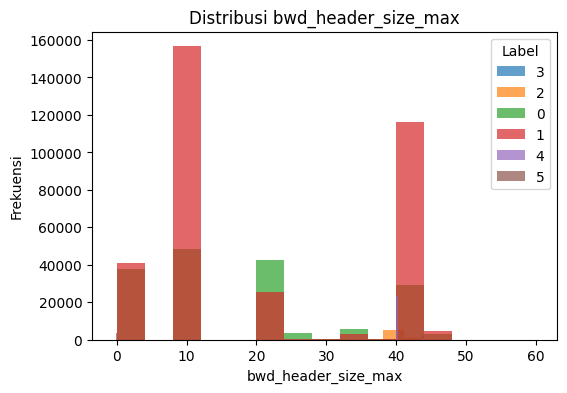

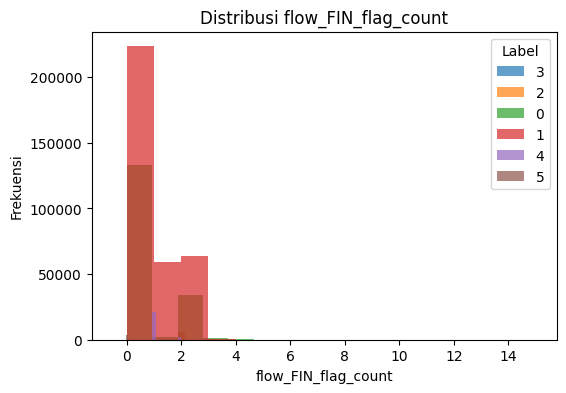

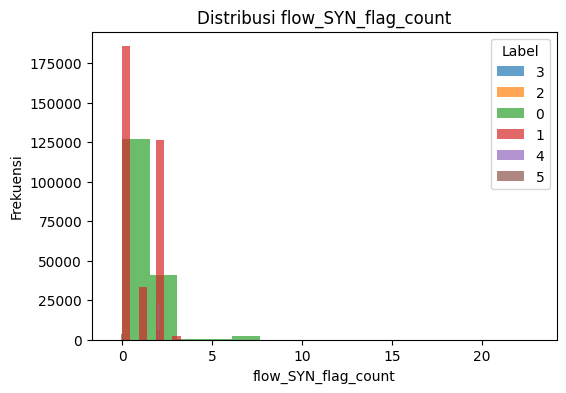

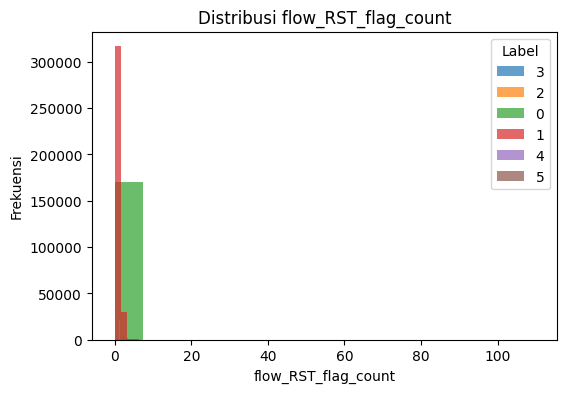

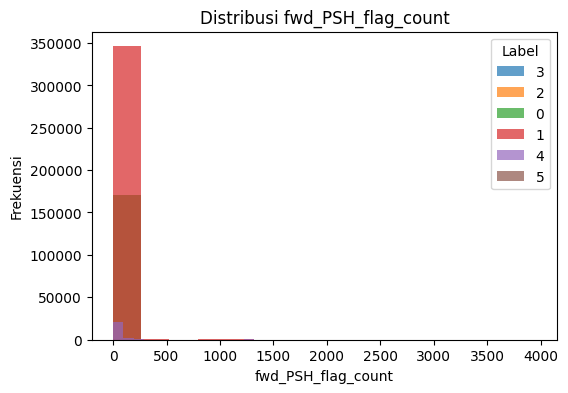

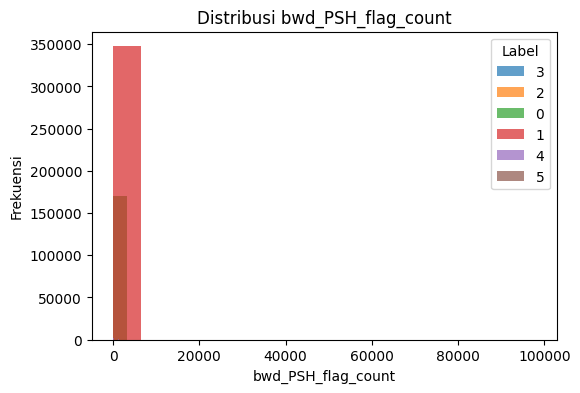

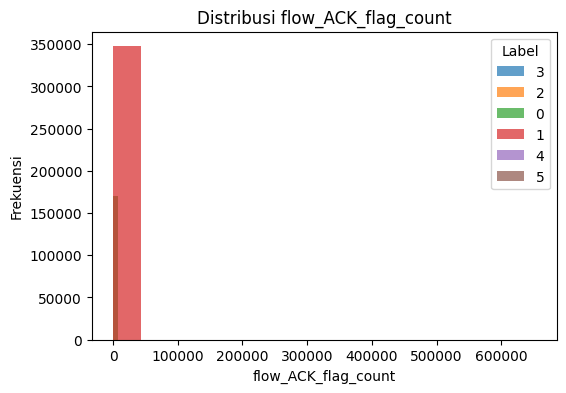

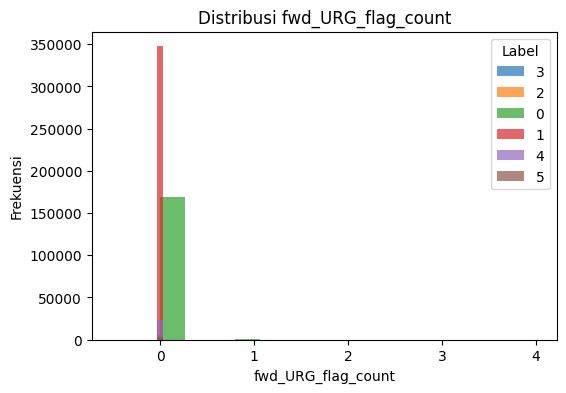

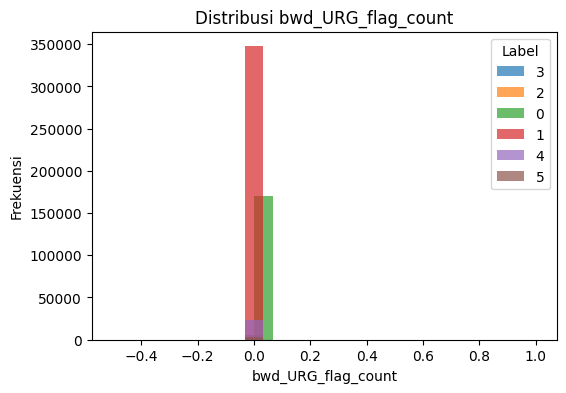

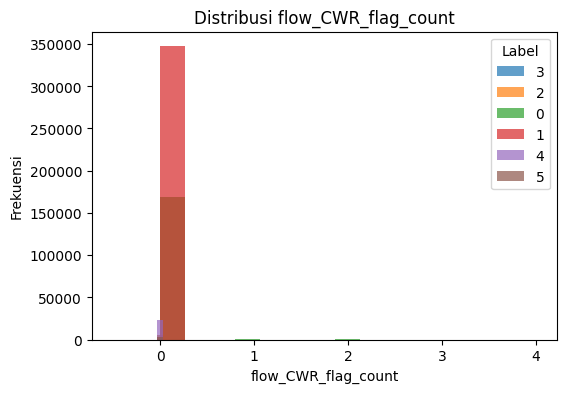

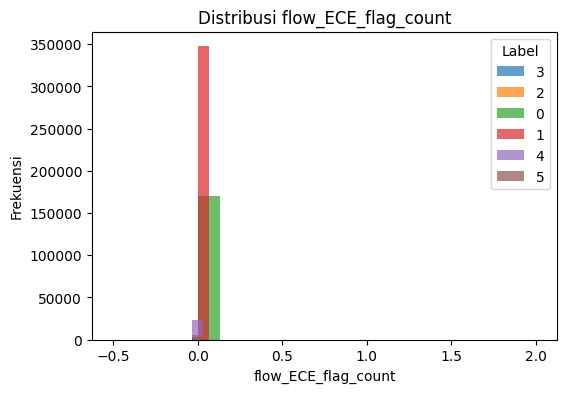

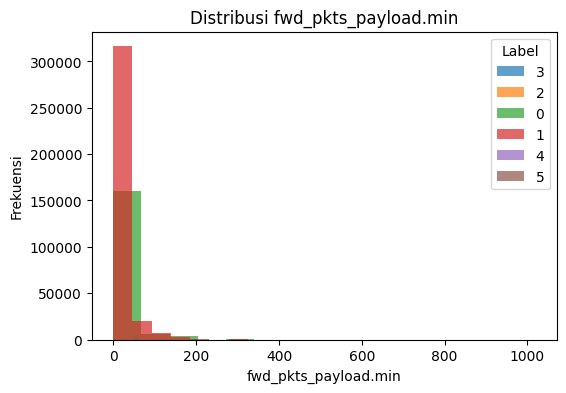

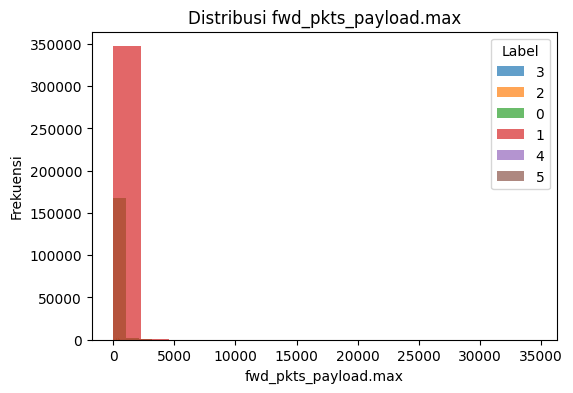

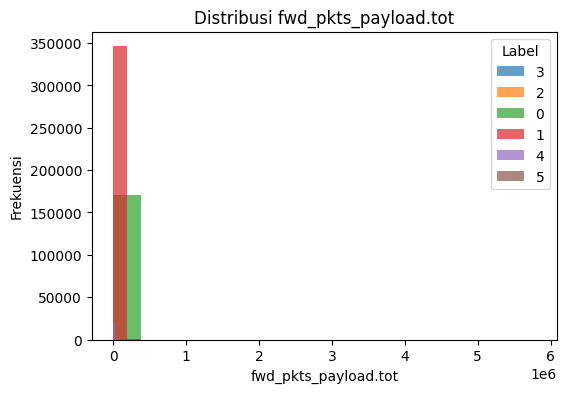

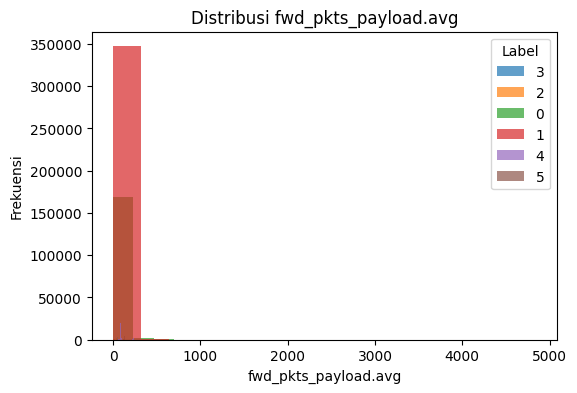

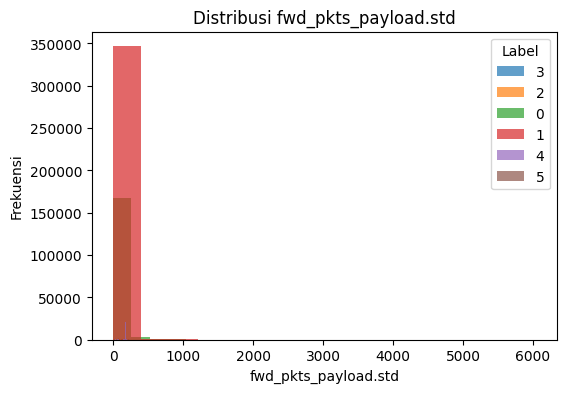

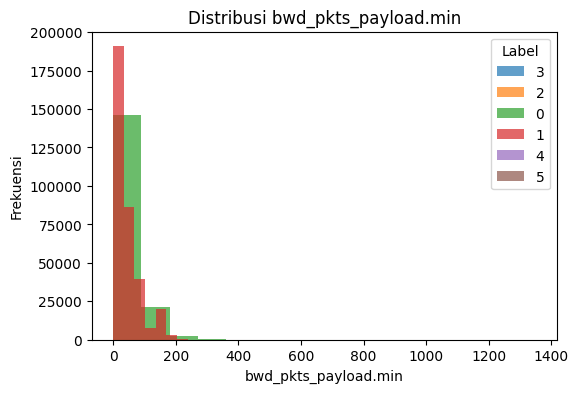

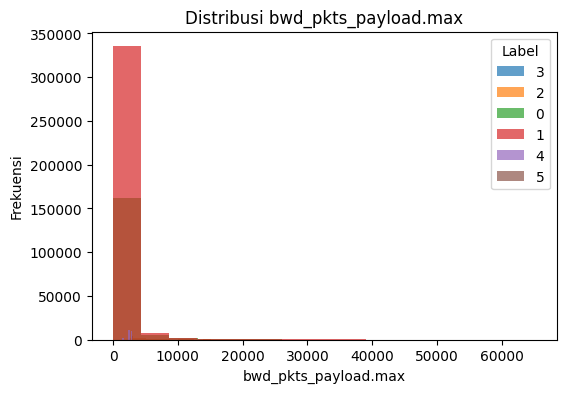

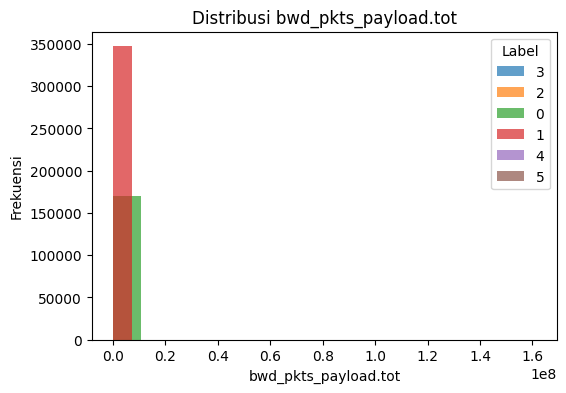

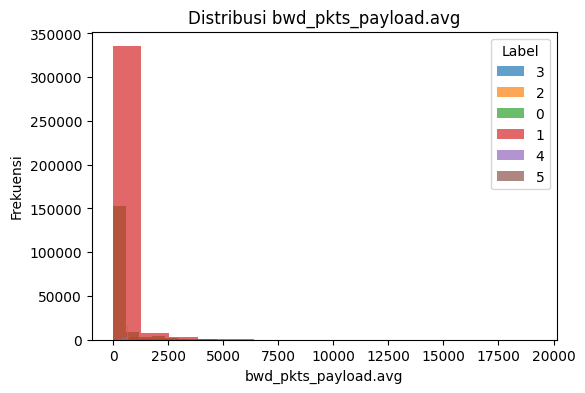

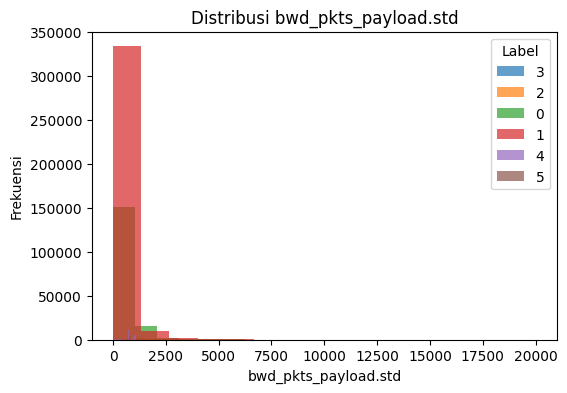

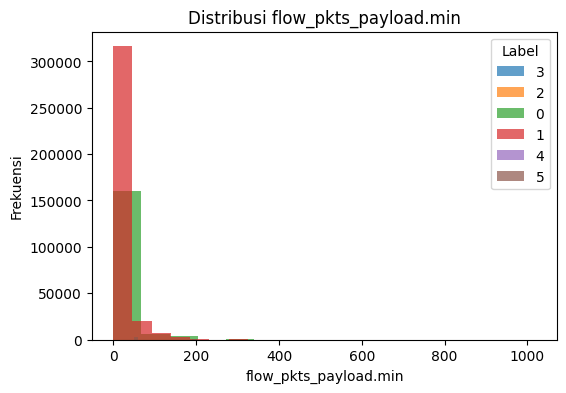

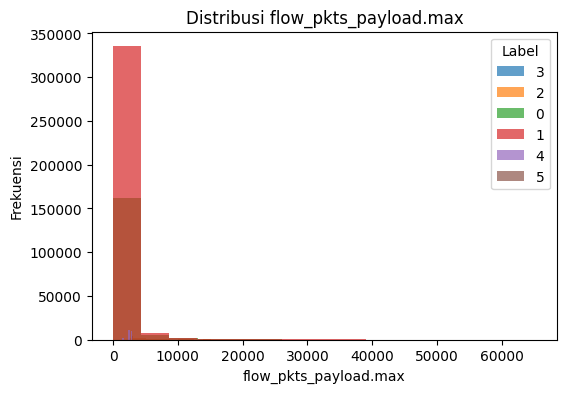

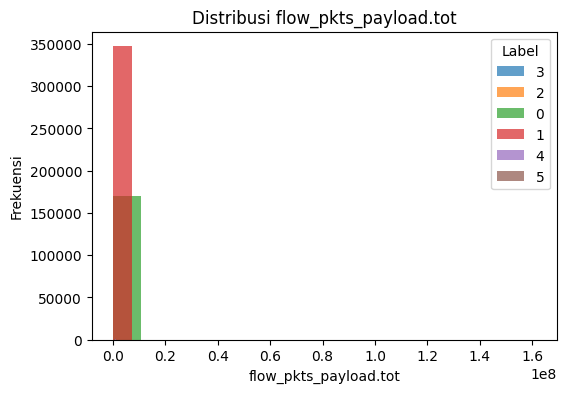

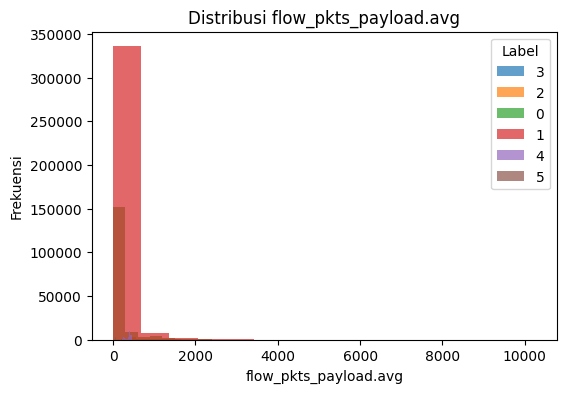

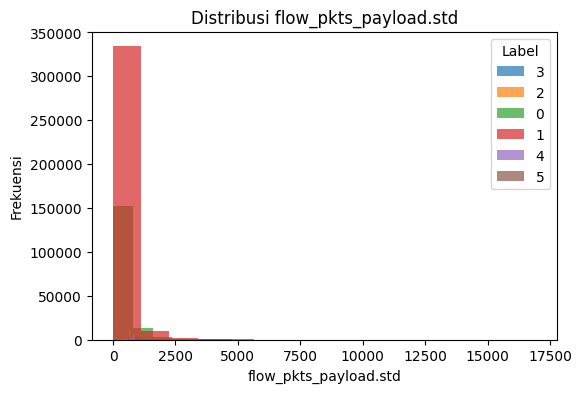

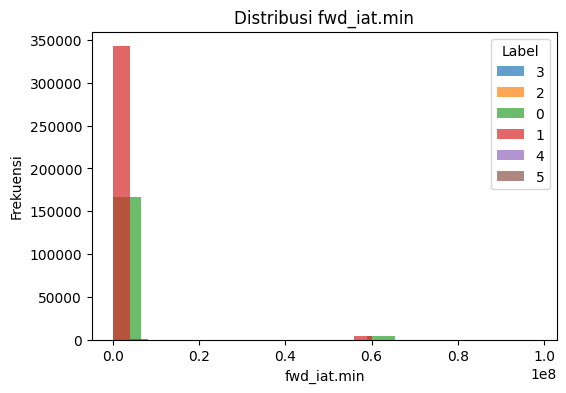

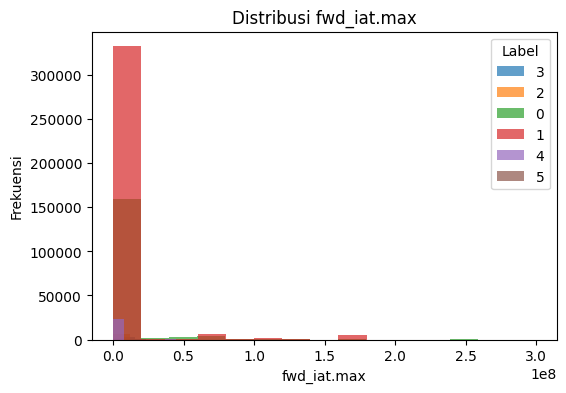

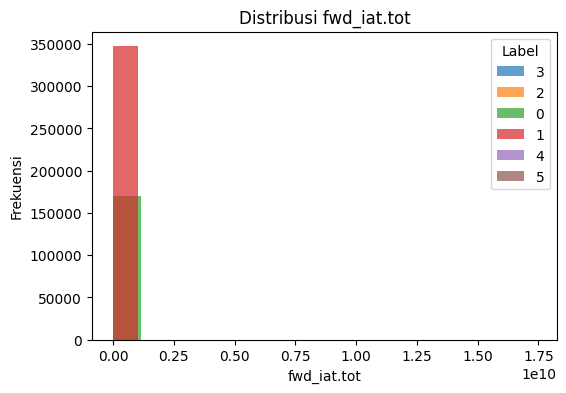

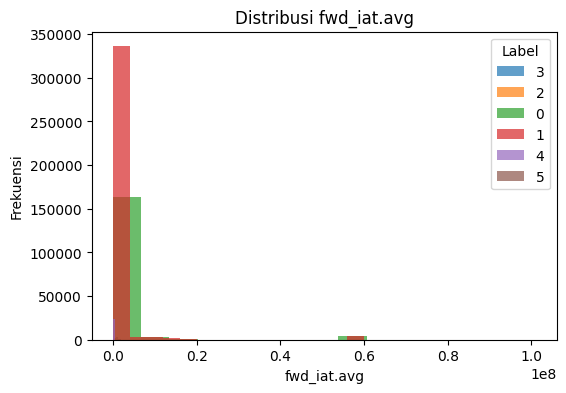

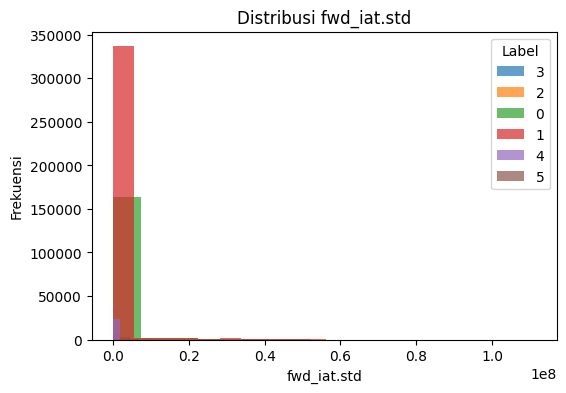

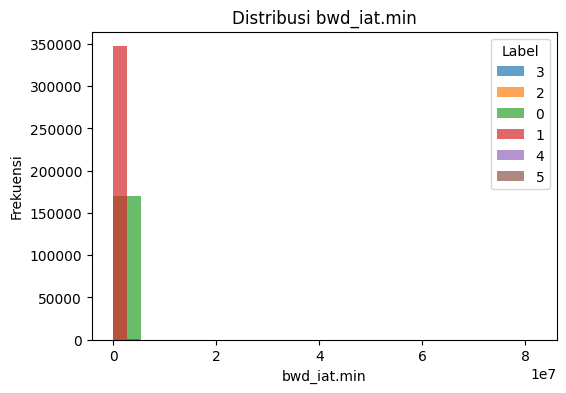

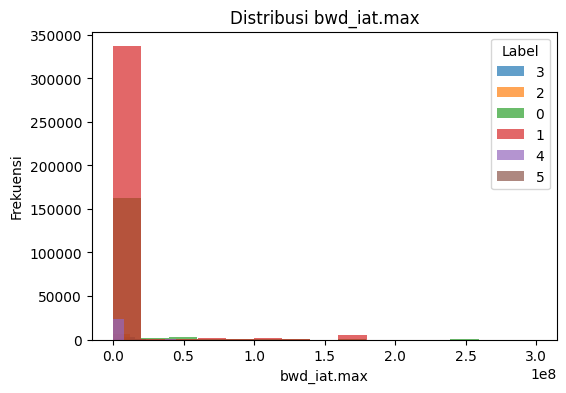

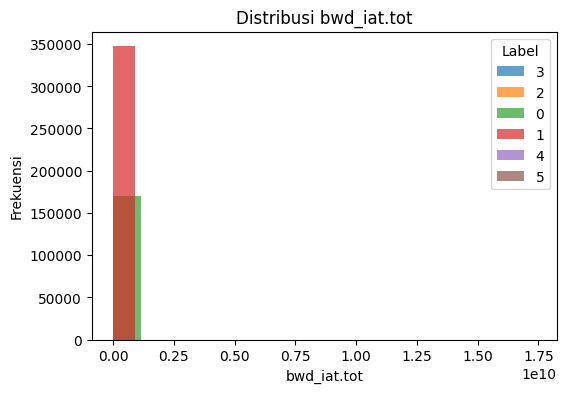

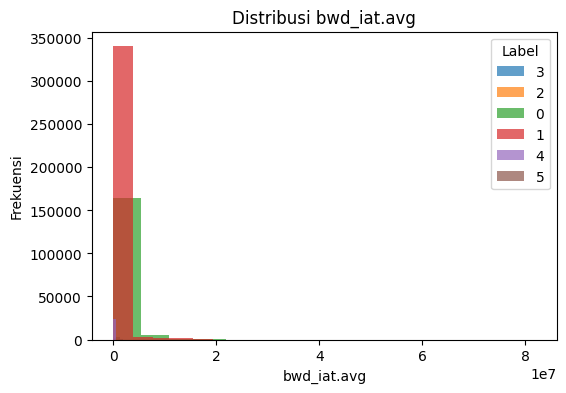

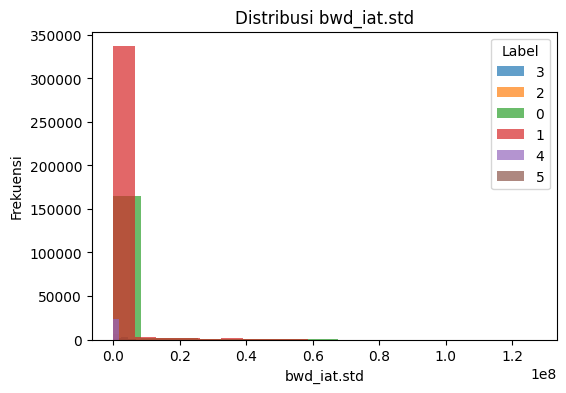

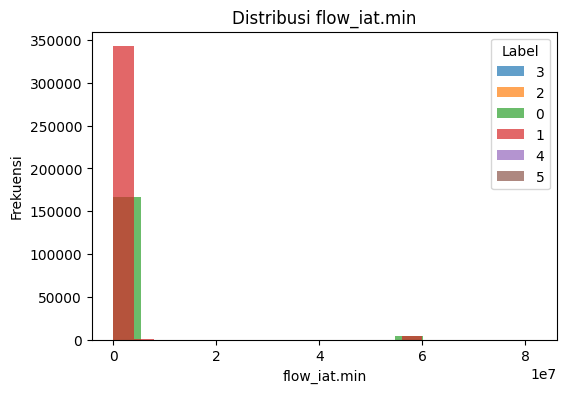

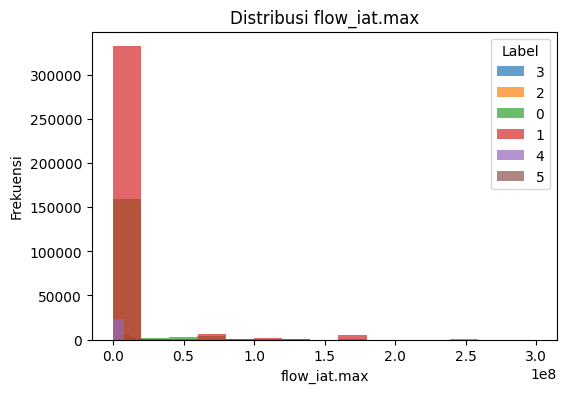

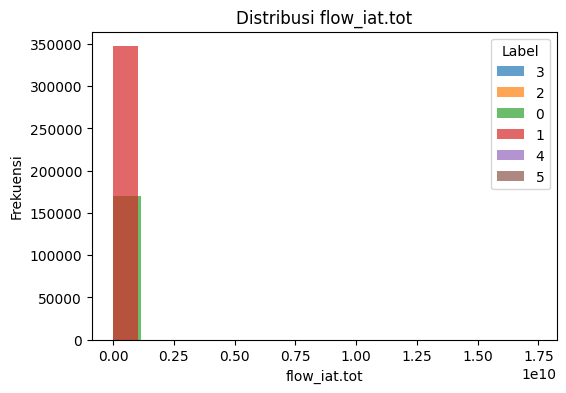

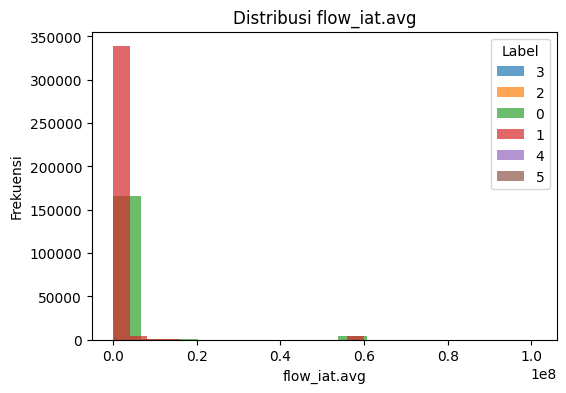

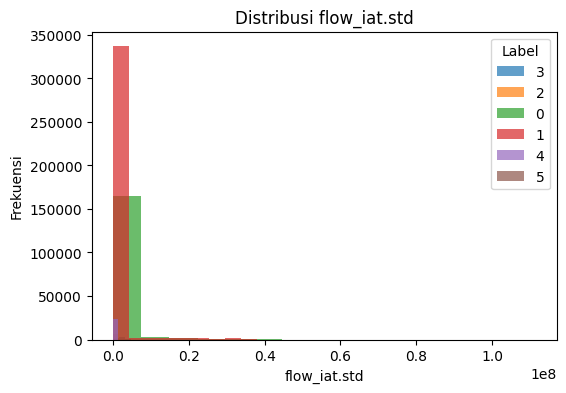

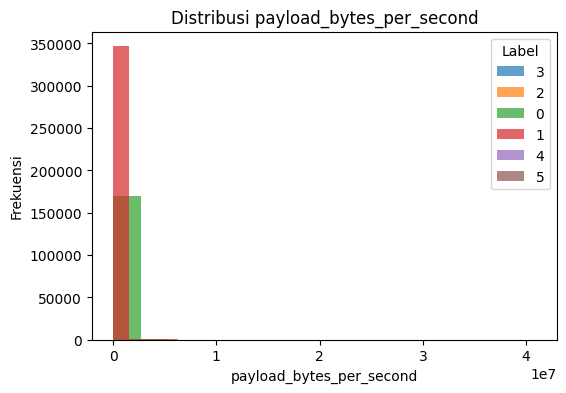

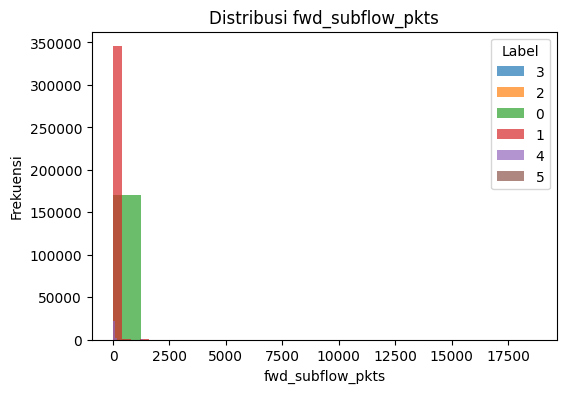

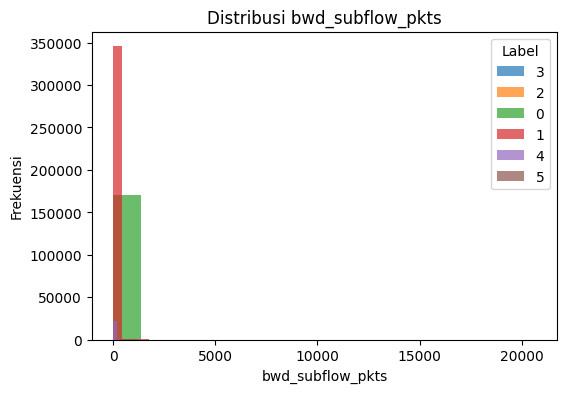

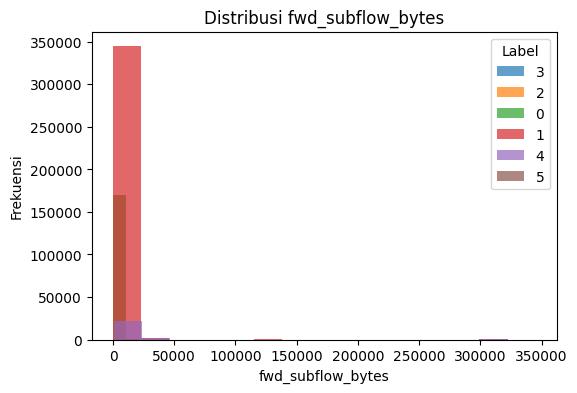

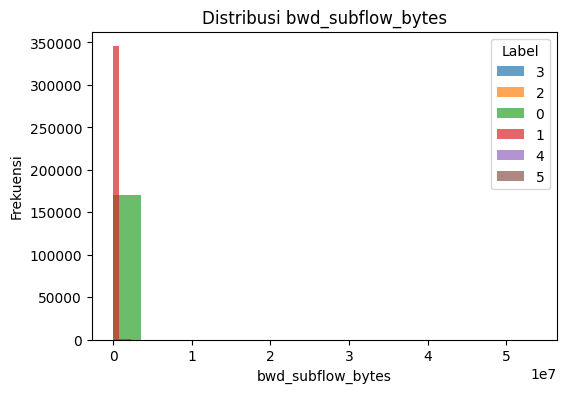

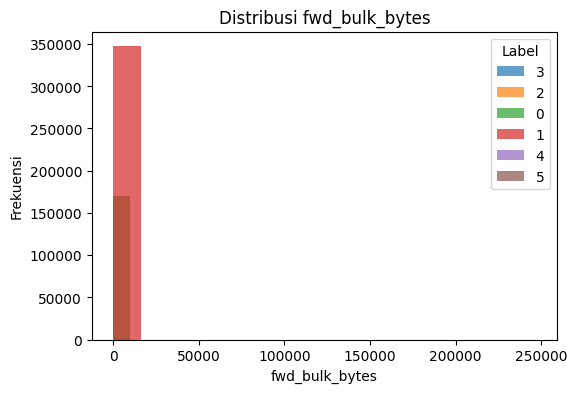

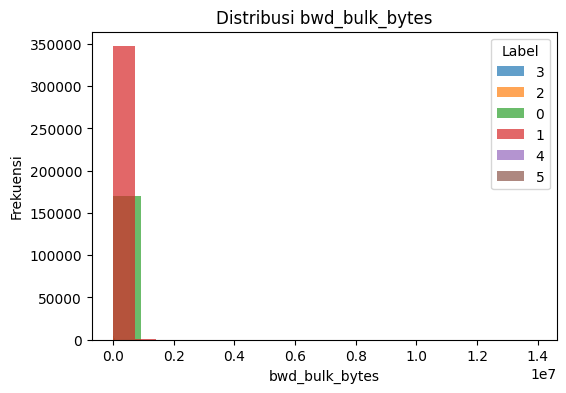

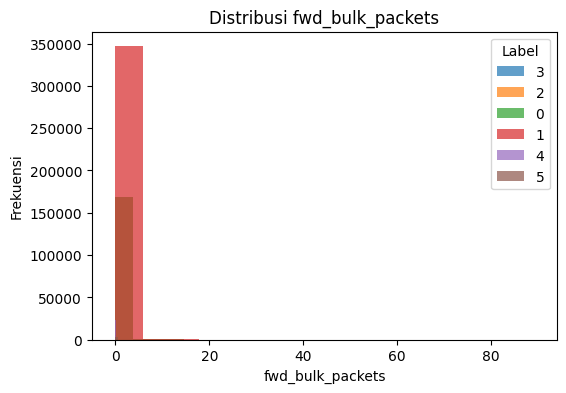

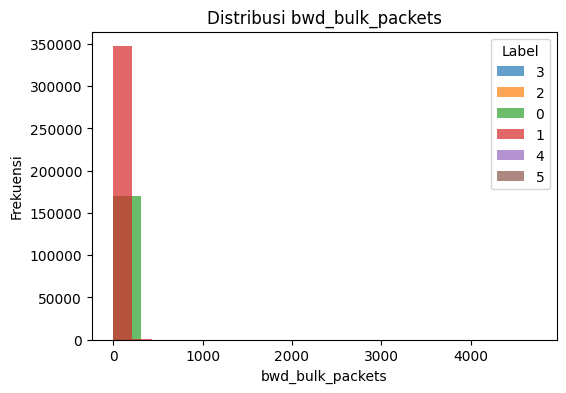

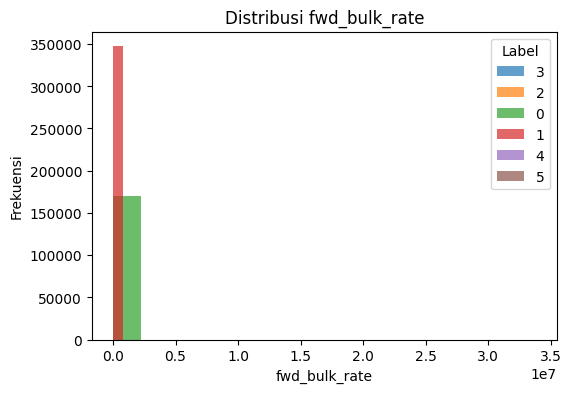

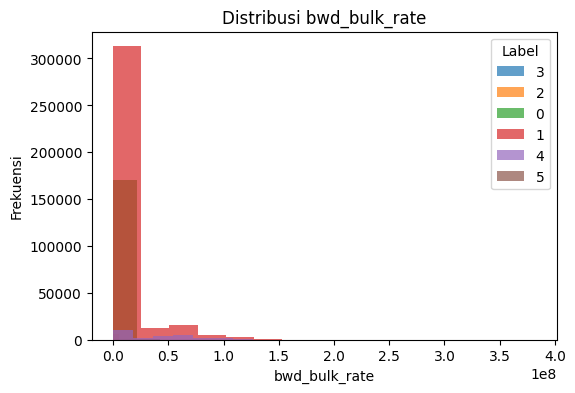

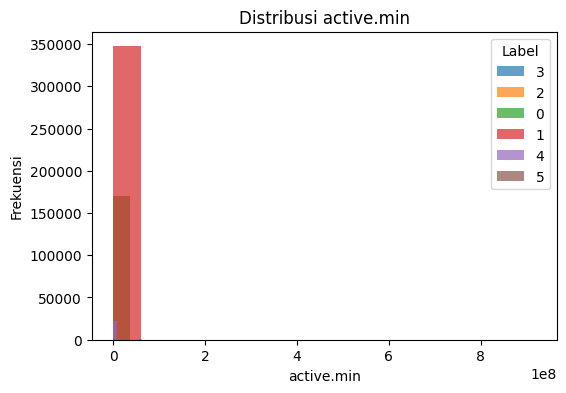

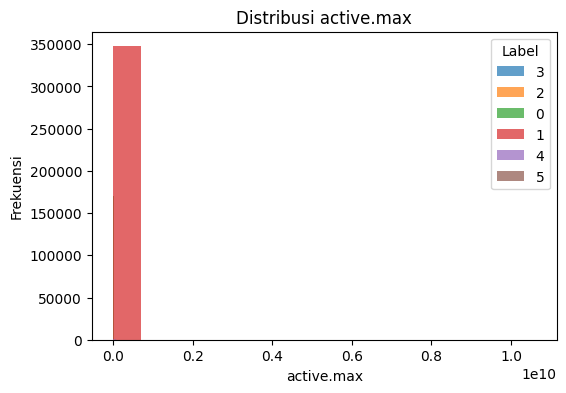

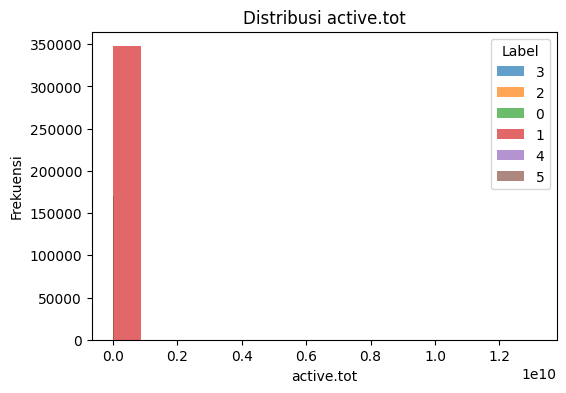

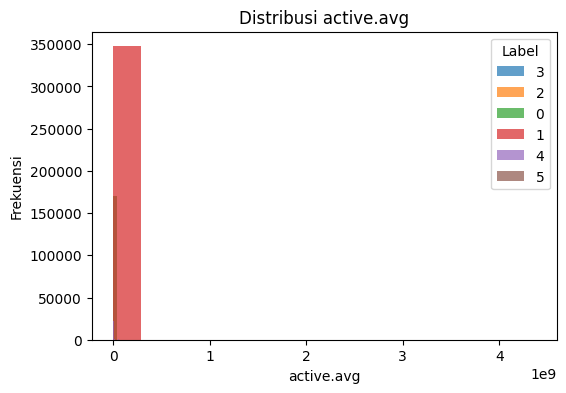

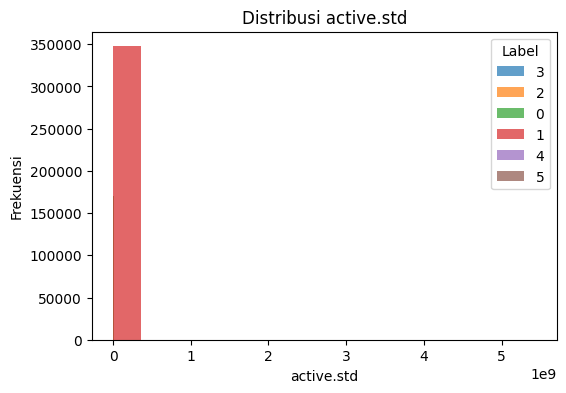

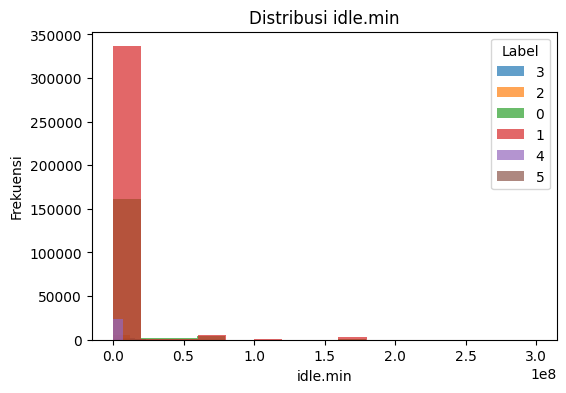

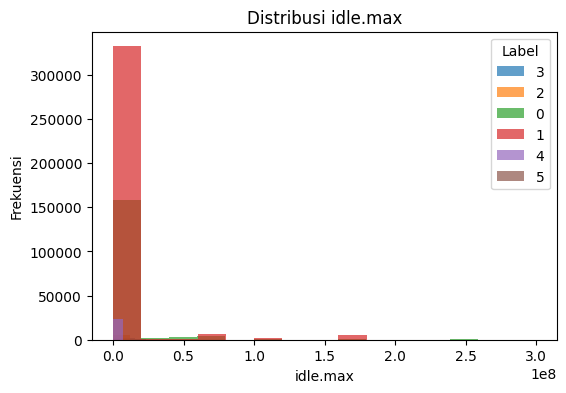

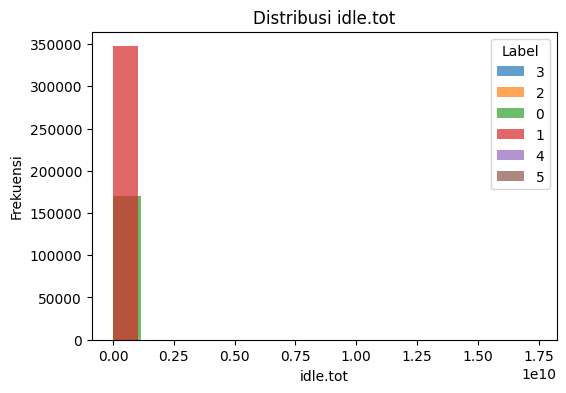

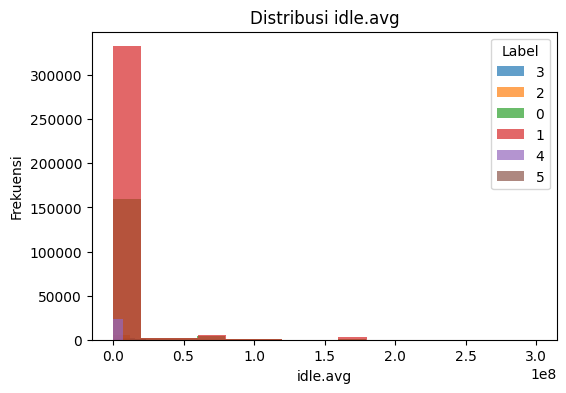

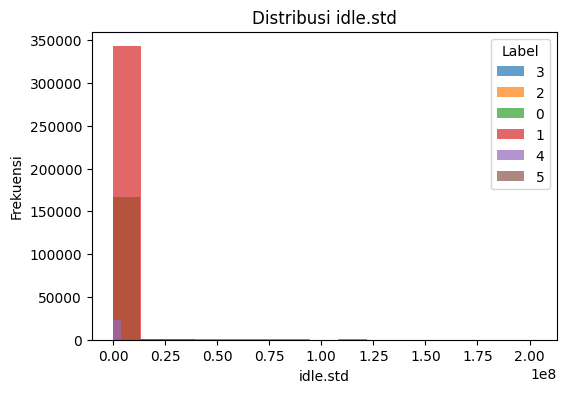

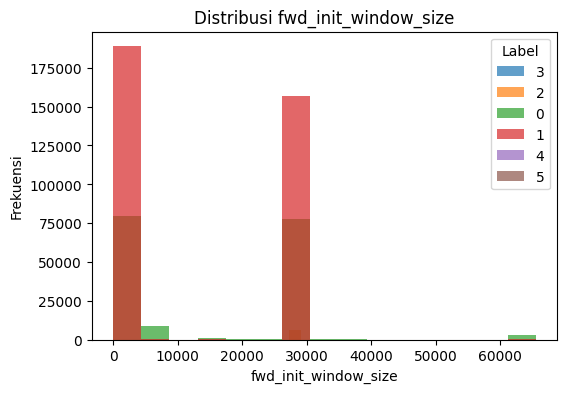

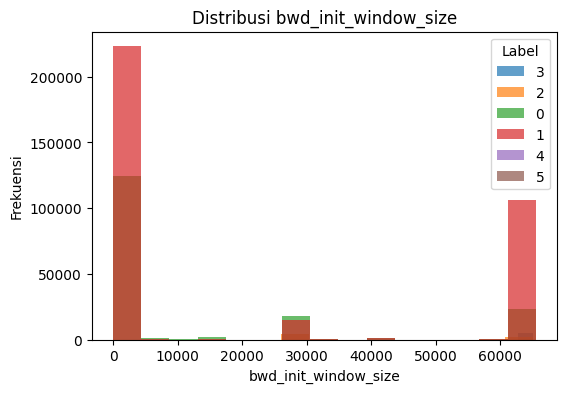

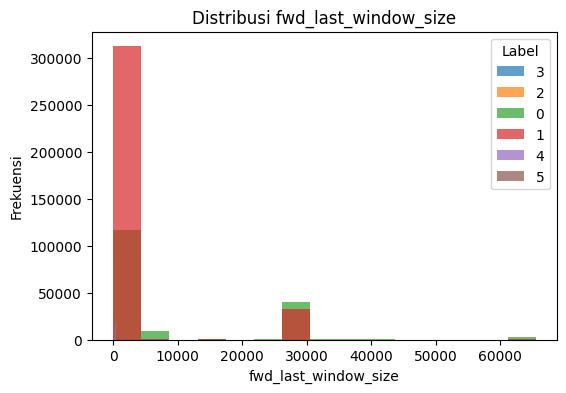

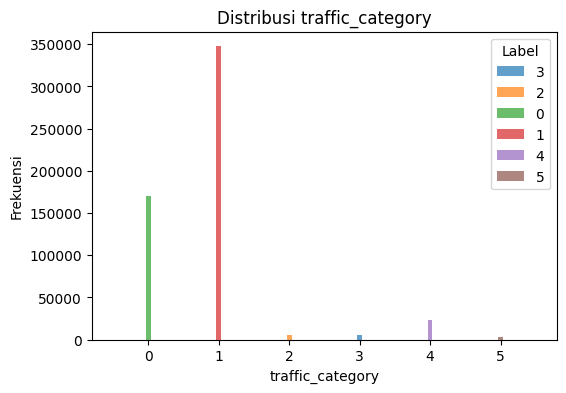

In [62]:
for feature in df.columns:
    plt.figure(figsize=(6, 4))
    for label in df['traffic_category'].unique():
        subset = df[df['traffic_category'] == label]
        plt.hist(subset[feature], alpha=0.7, bins=15, label=label)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.legend(title="Label")
    plt.show()

## Mengecek Outlier

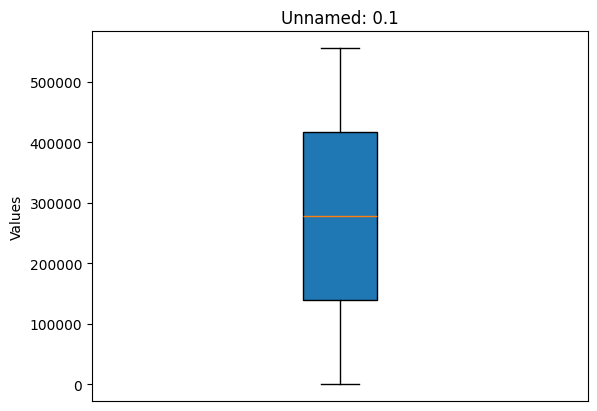

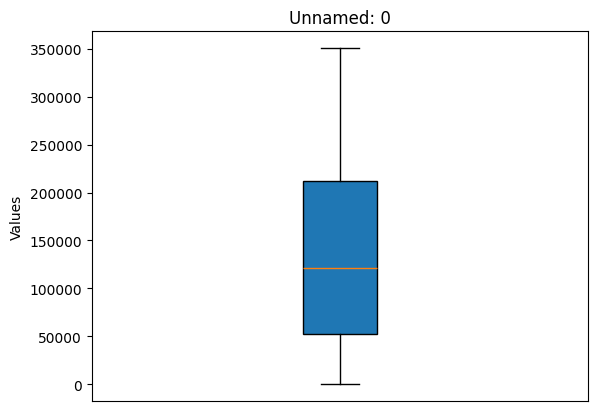

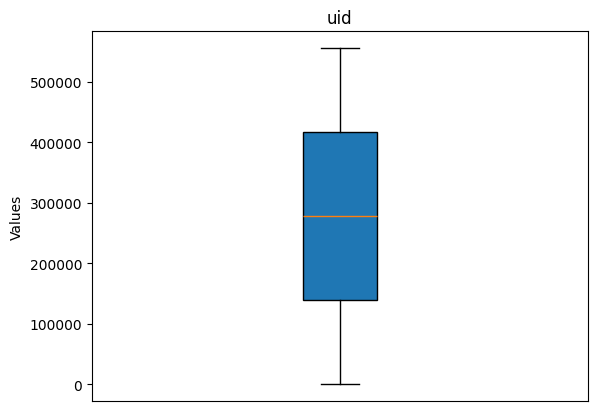

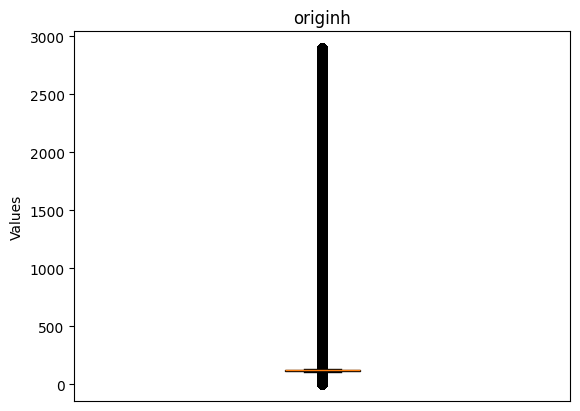

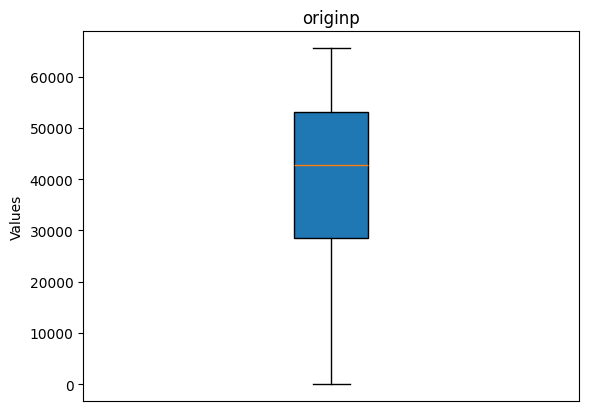

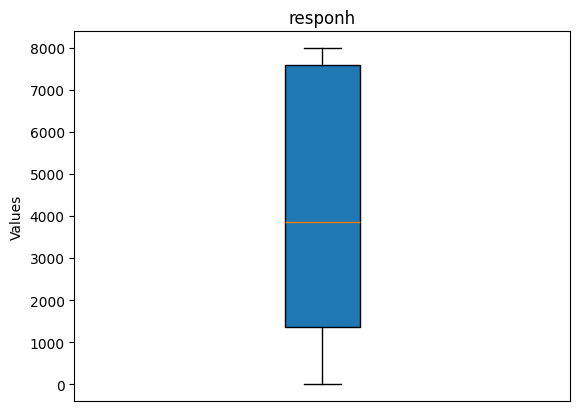

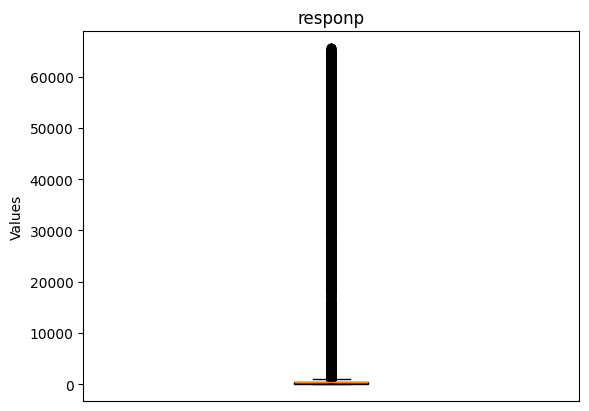

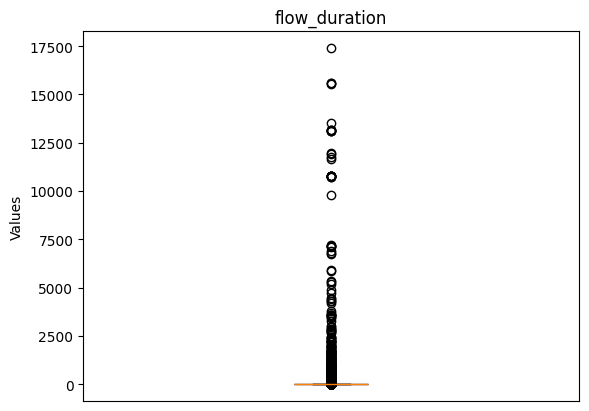

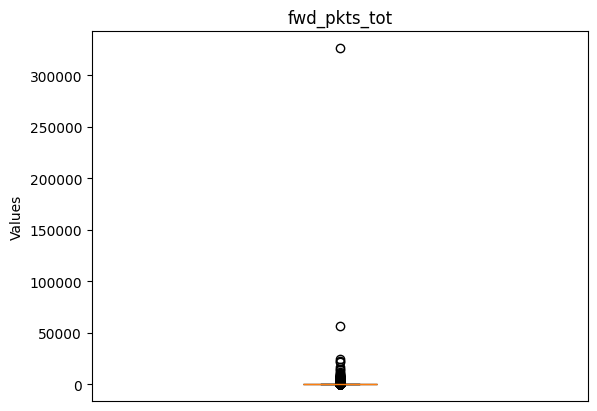

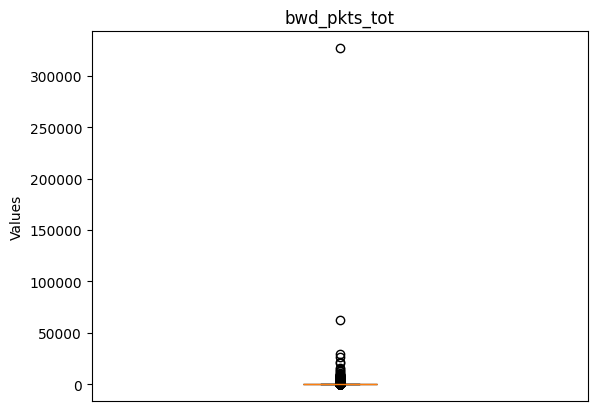

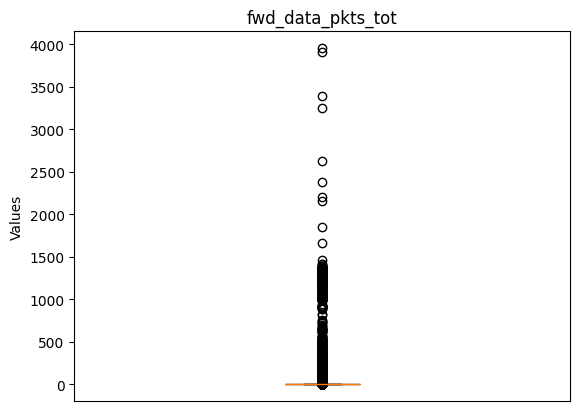

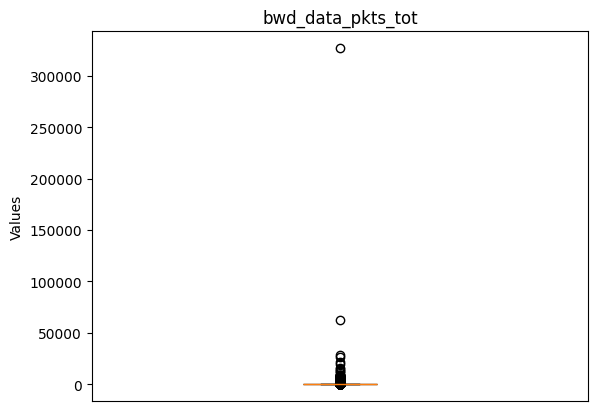

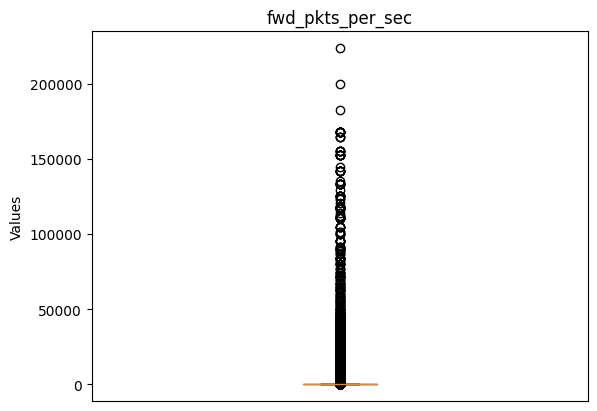

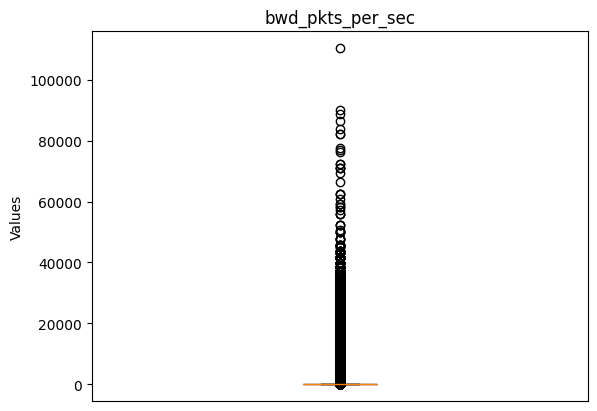

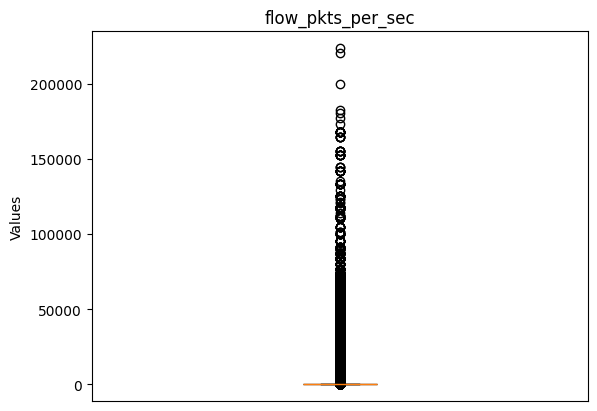

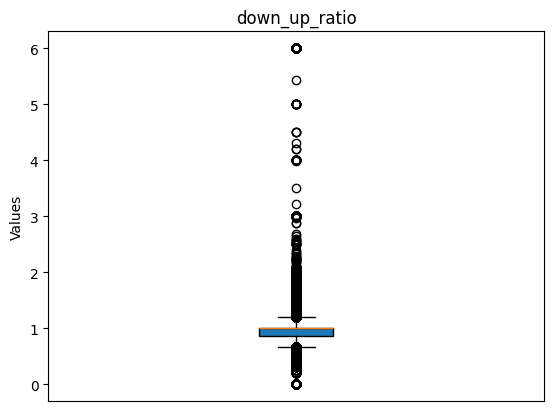

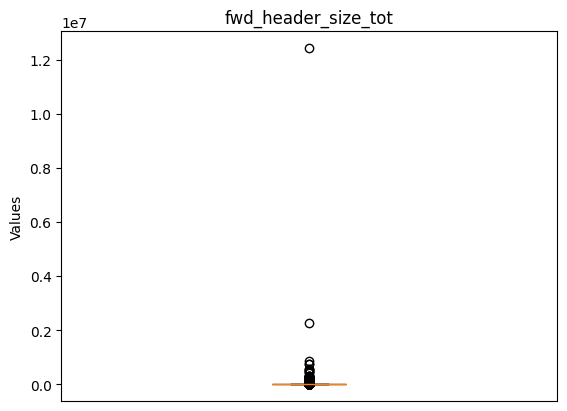

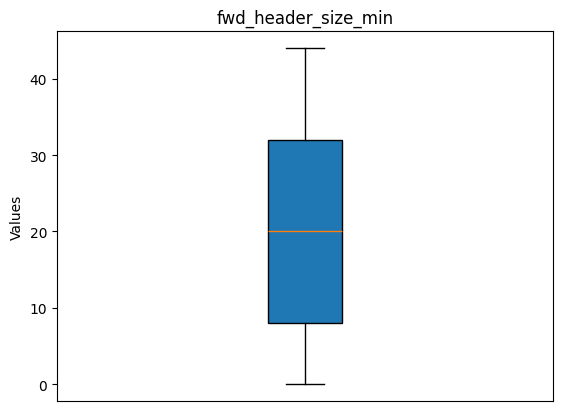

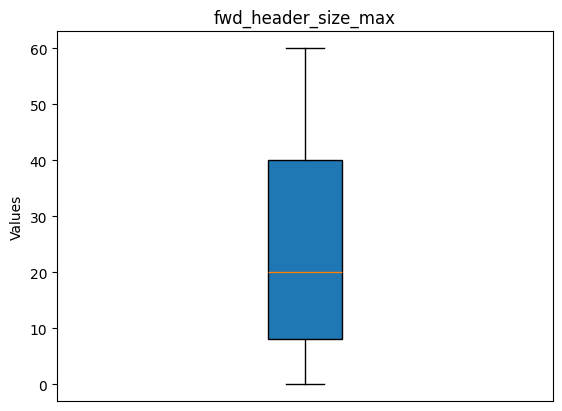

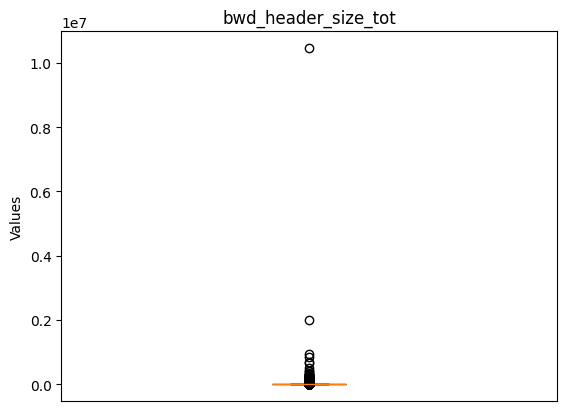

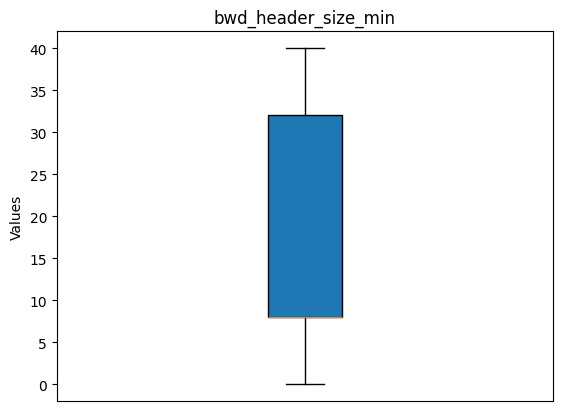

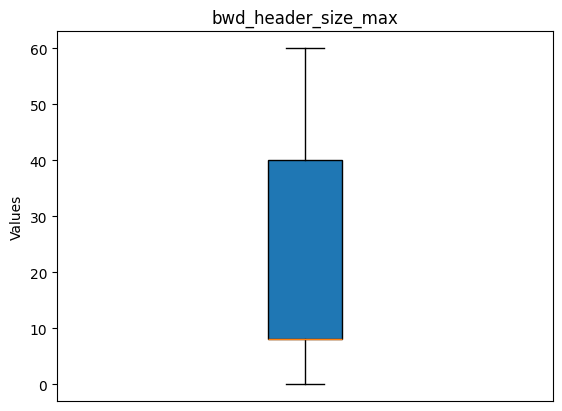

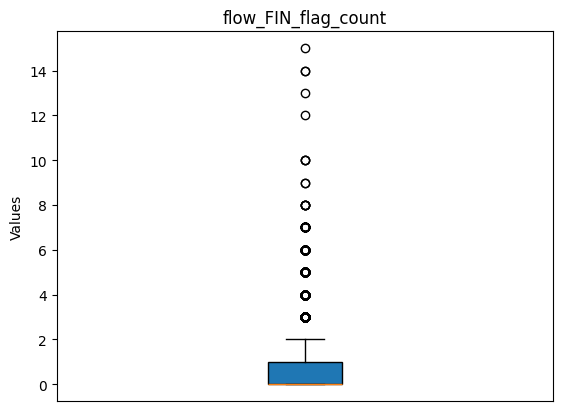

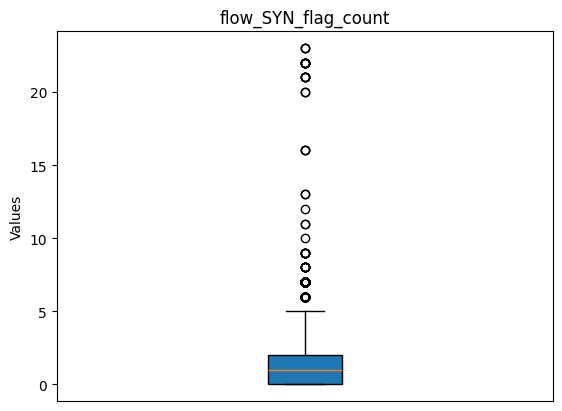

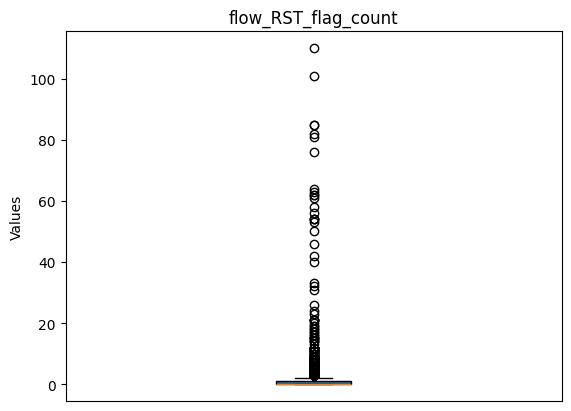

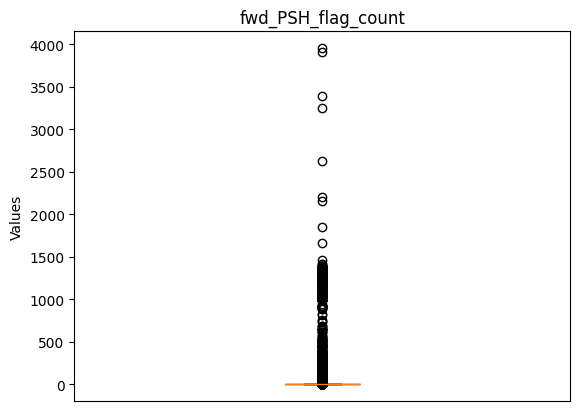

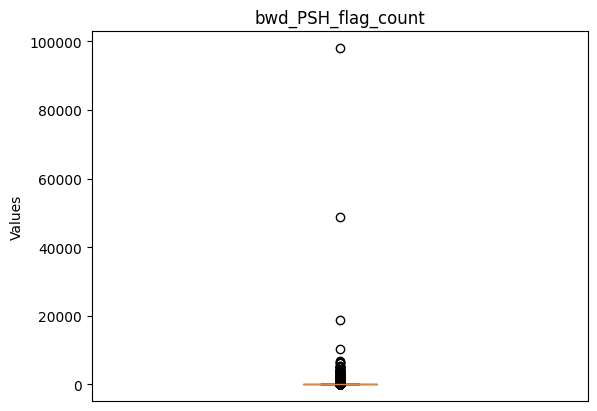

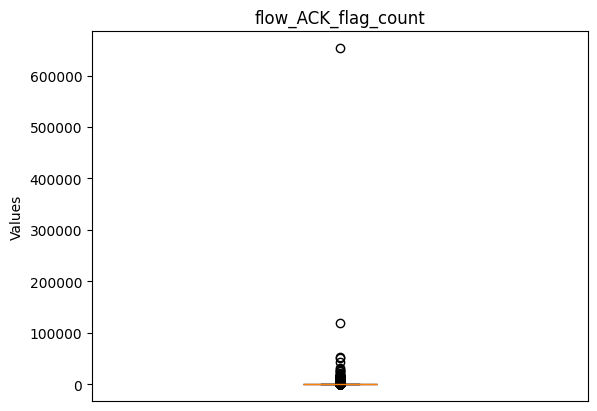

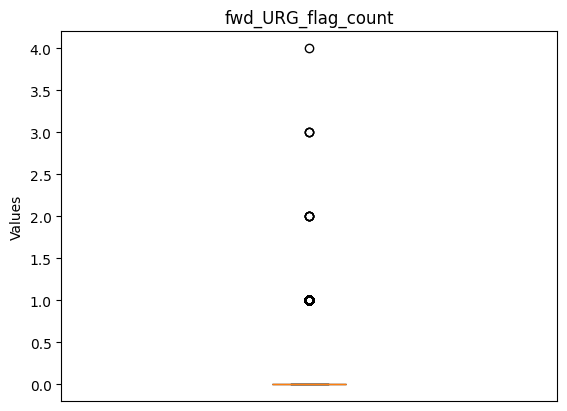

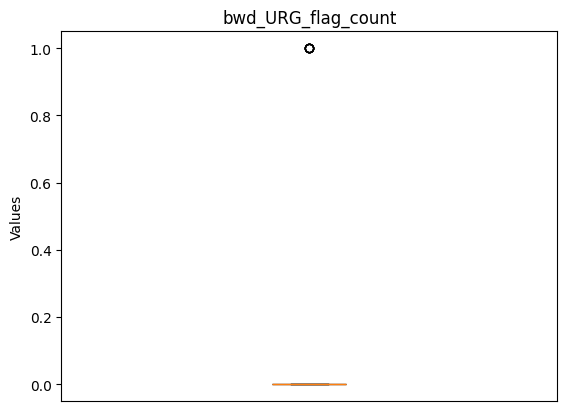

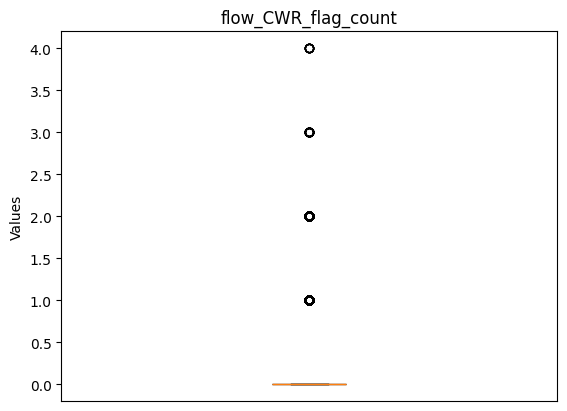

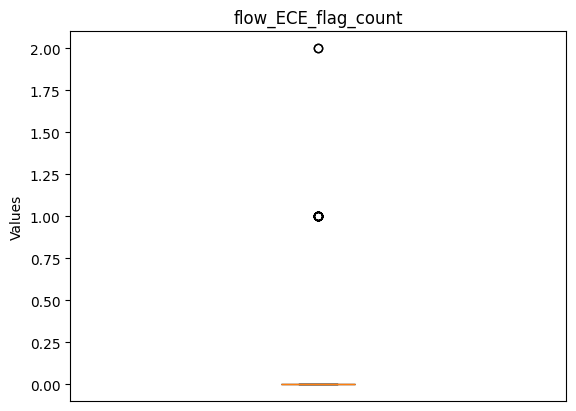

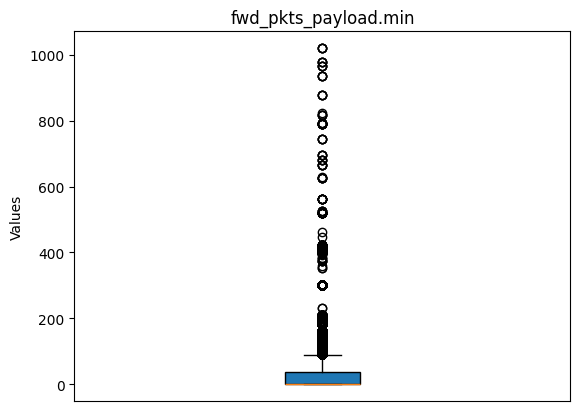

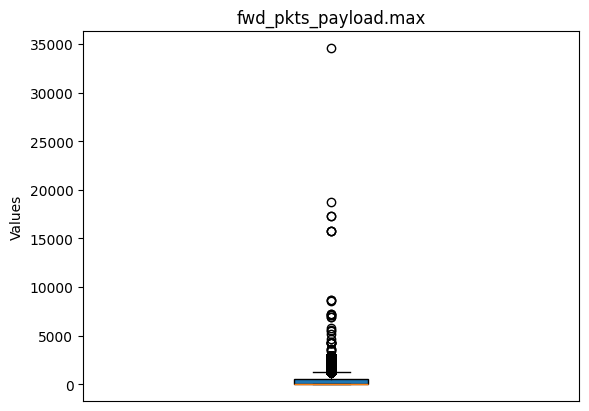

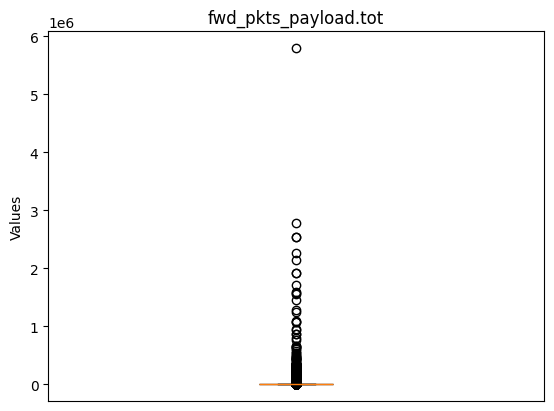

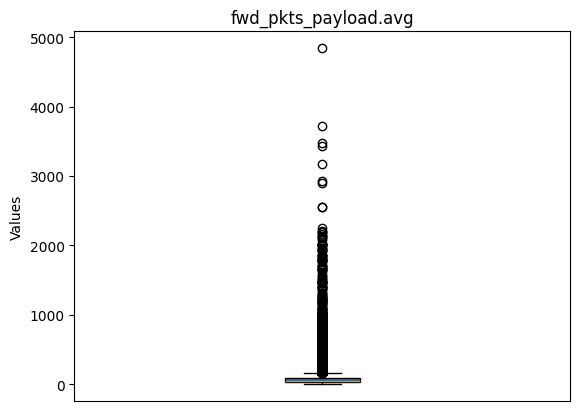

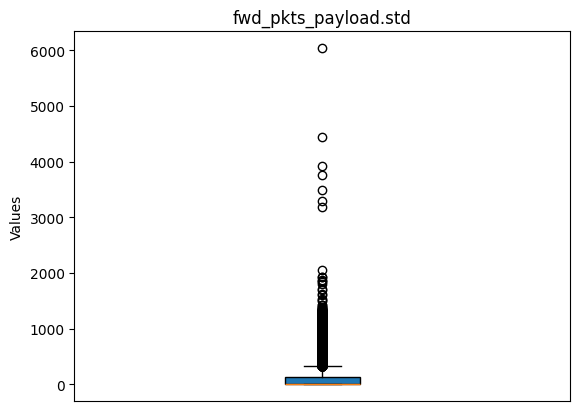

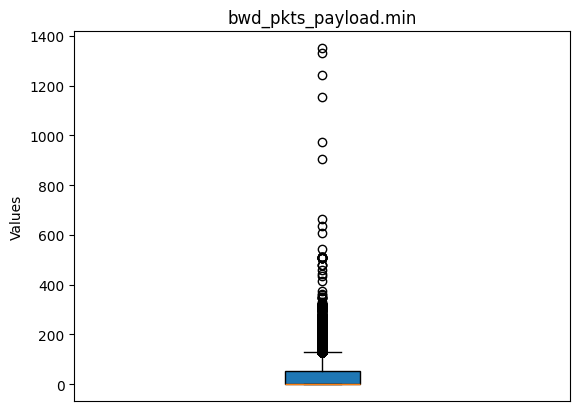

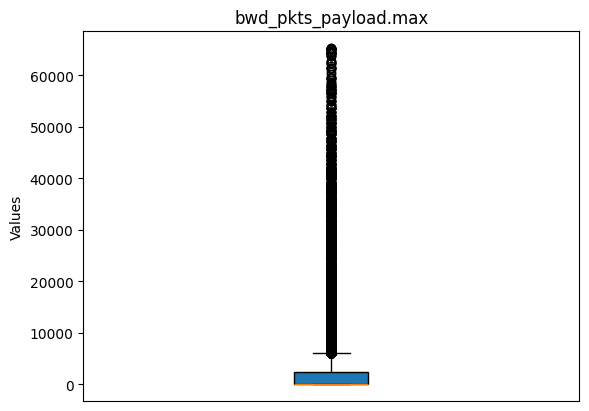

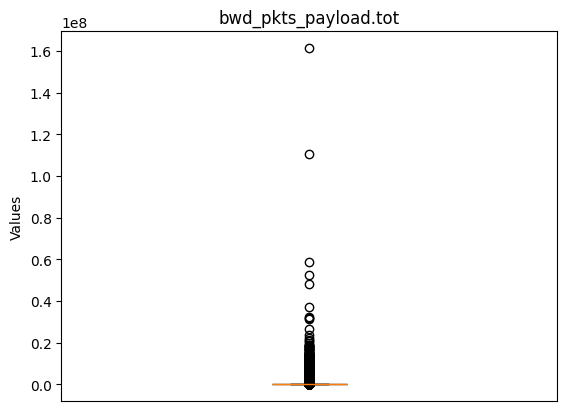

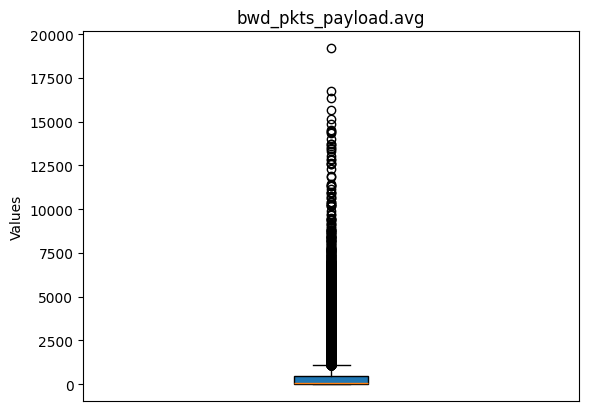

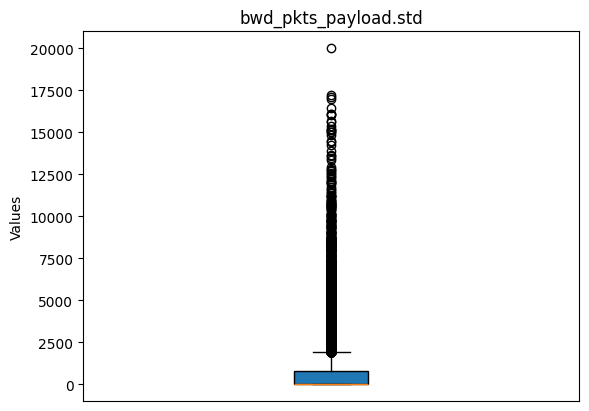

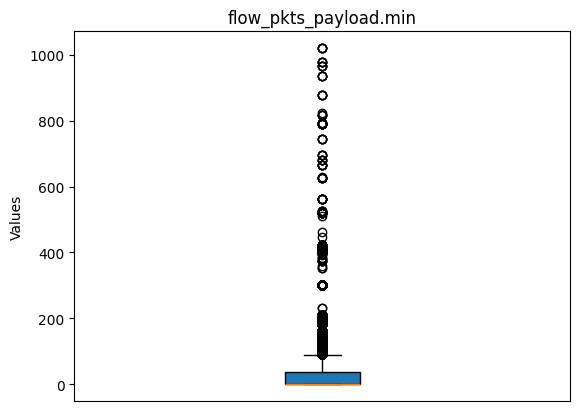

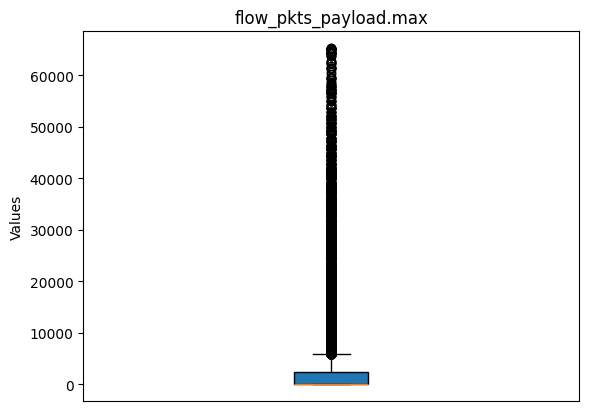

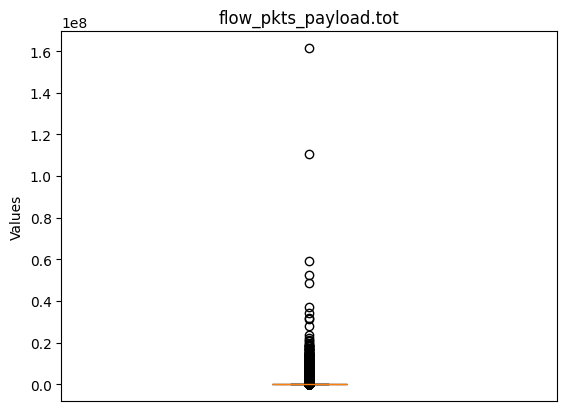

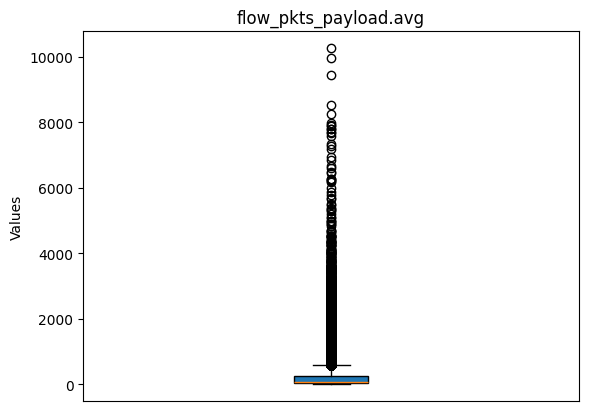

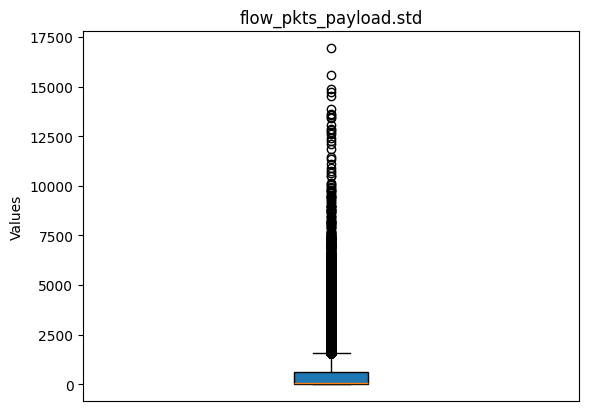

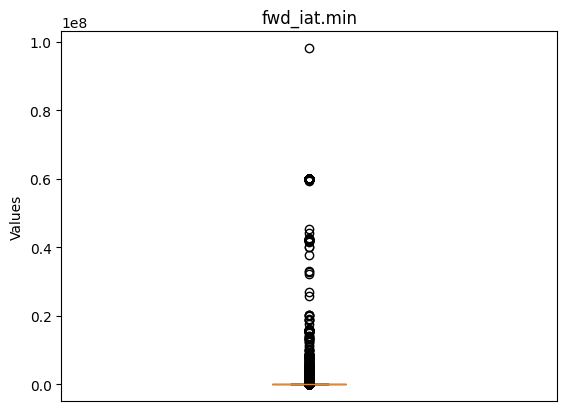

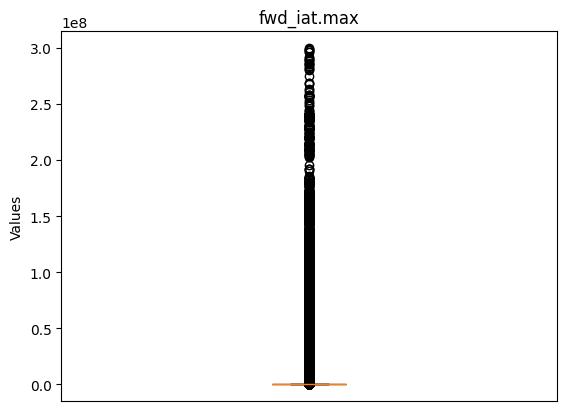

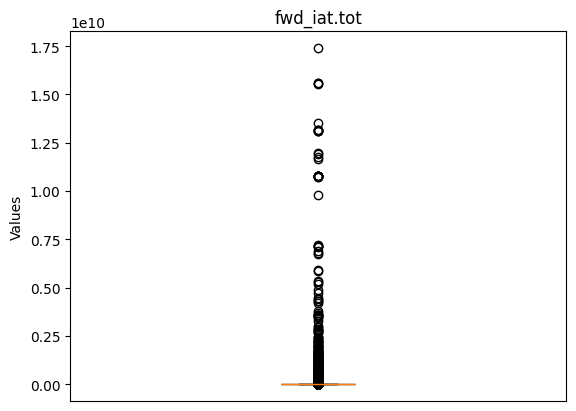

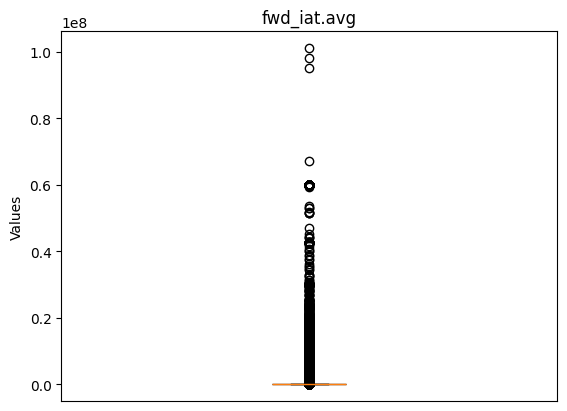

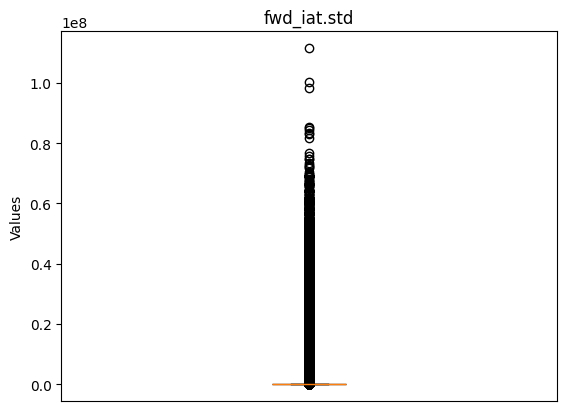

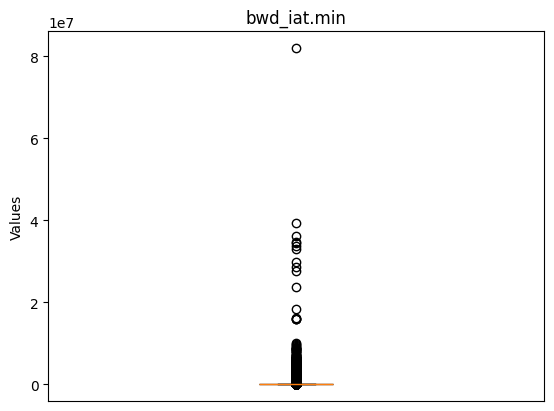

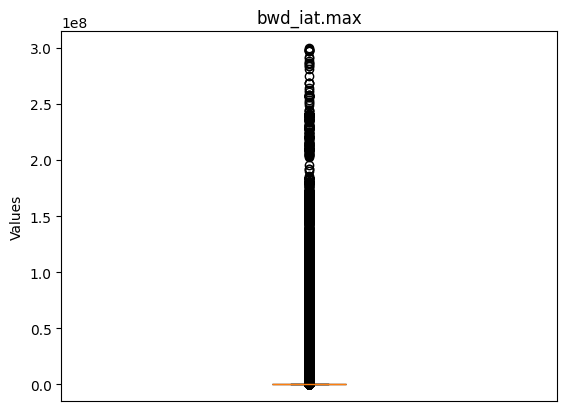

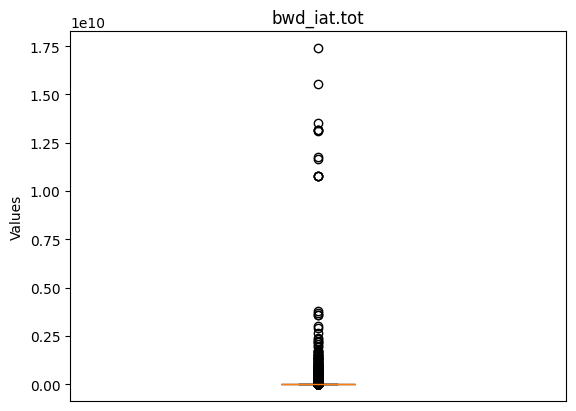

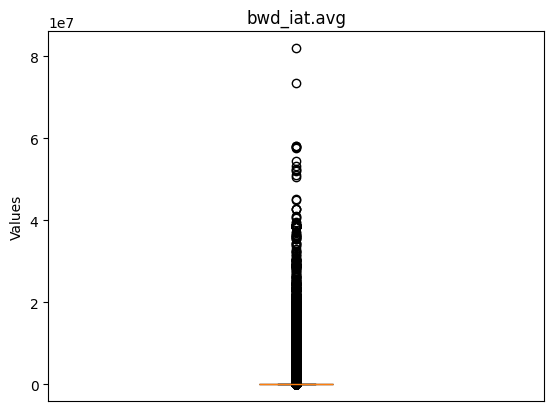

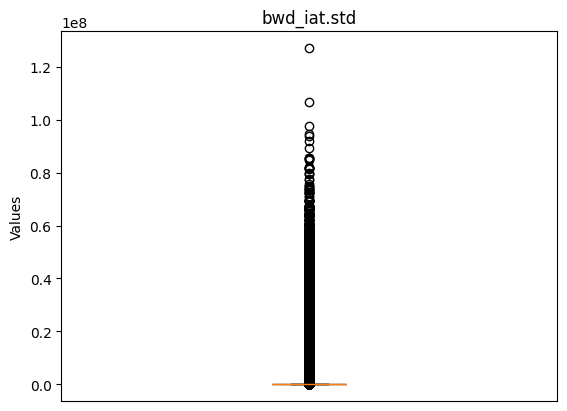

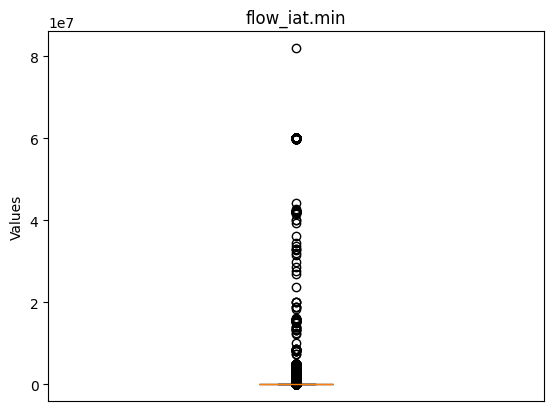

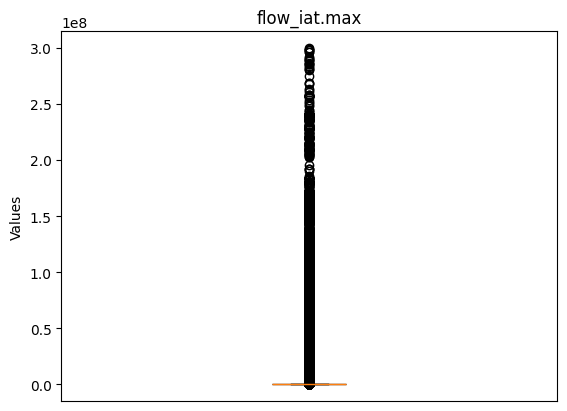

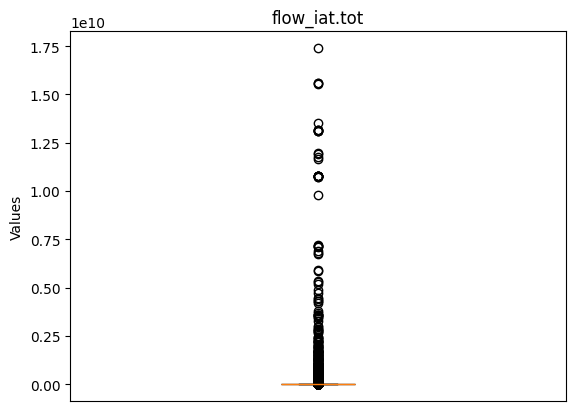

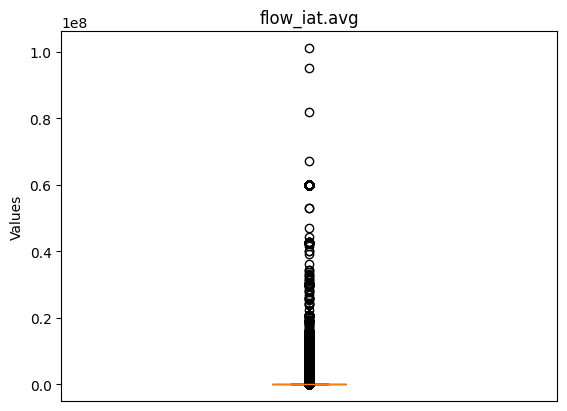

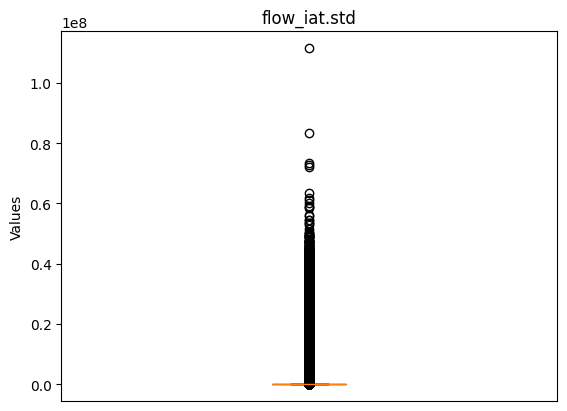

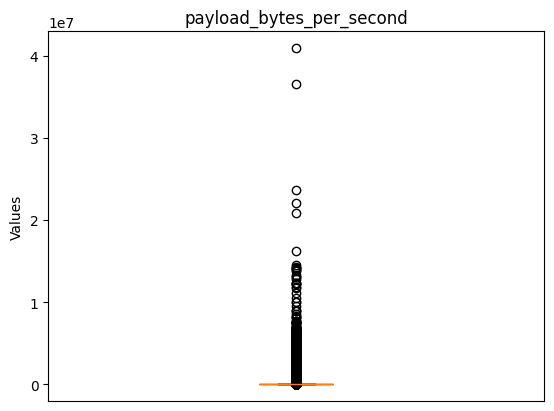

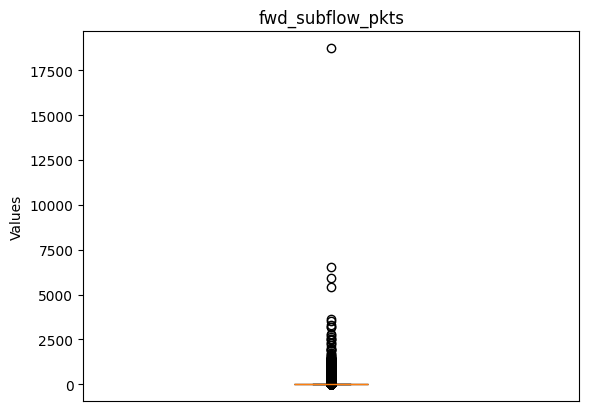

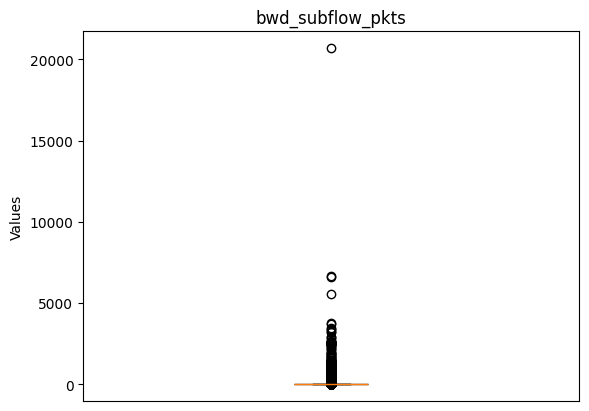

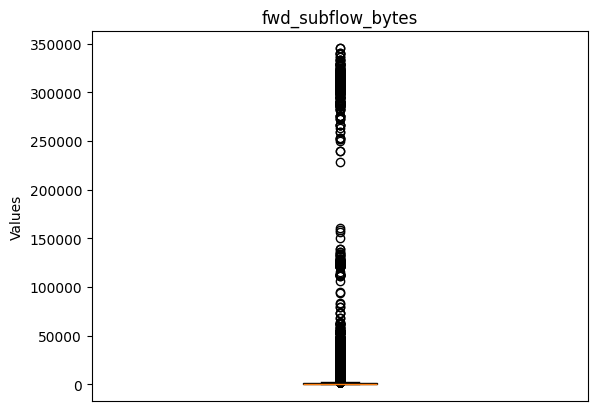

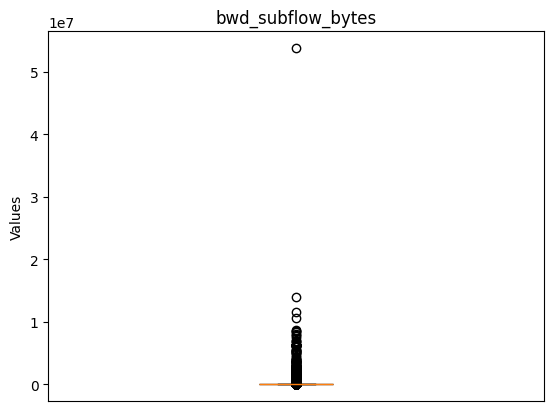

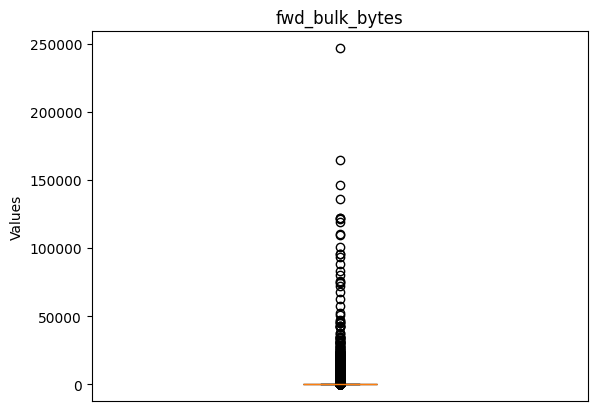

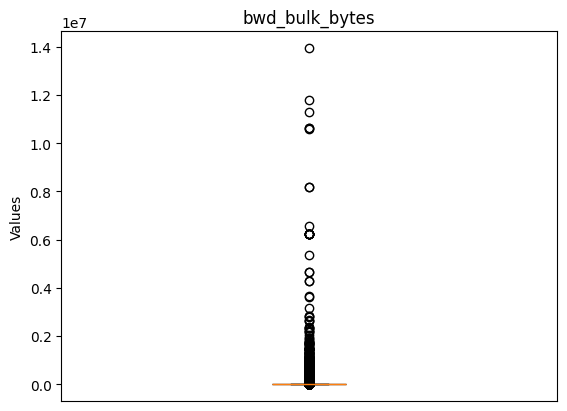

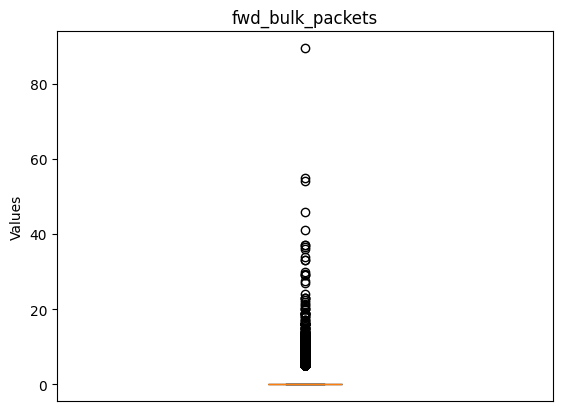

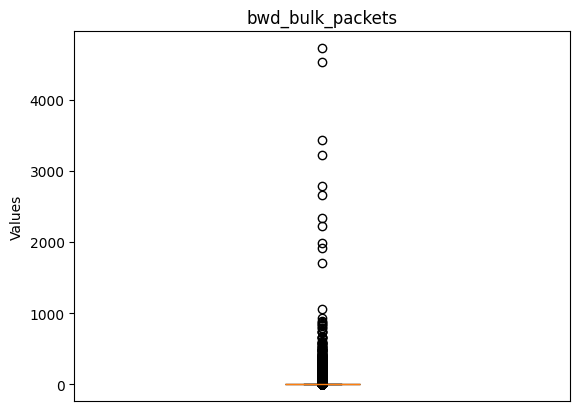

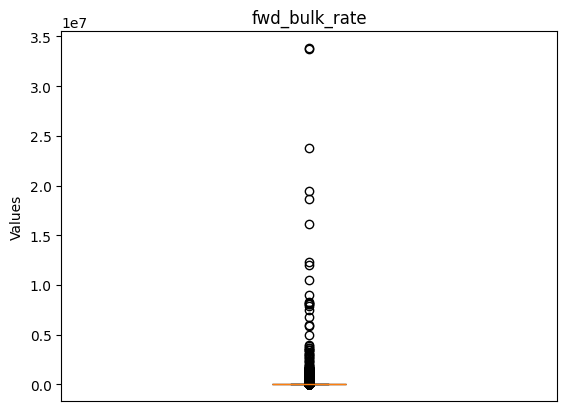

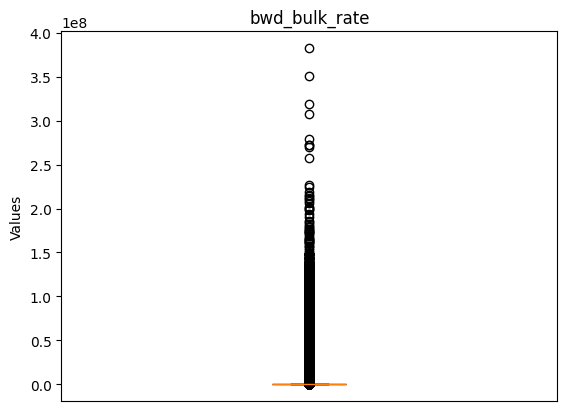

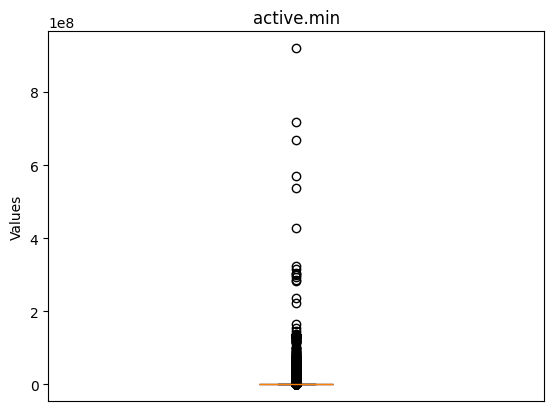

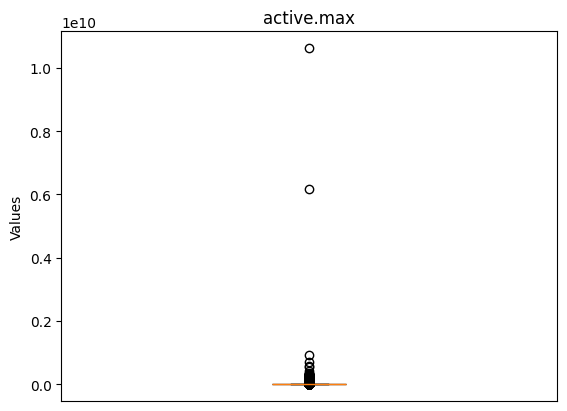

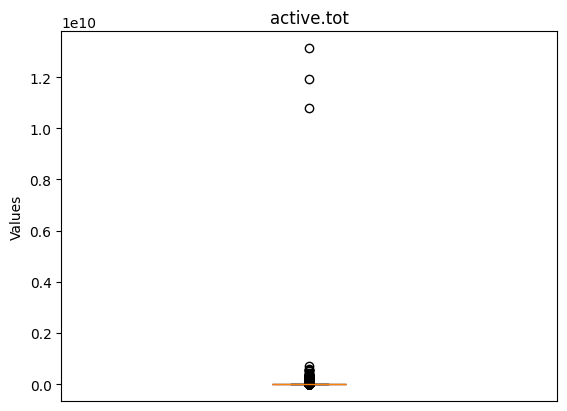

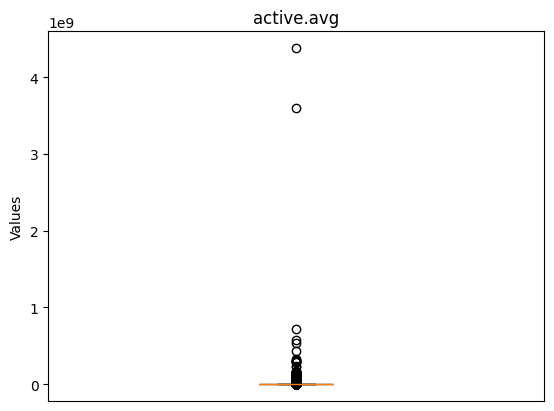

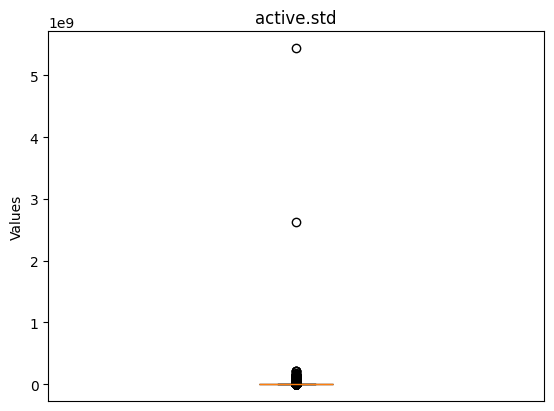

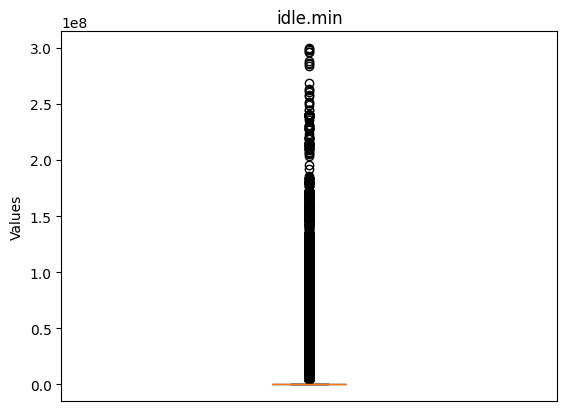

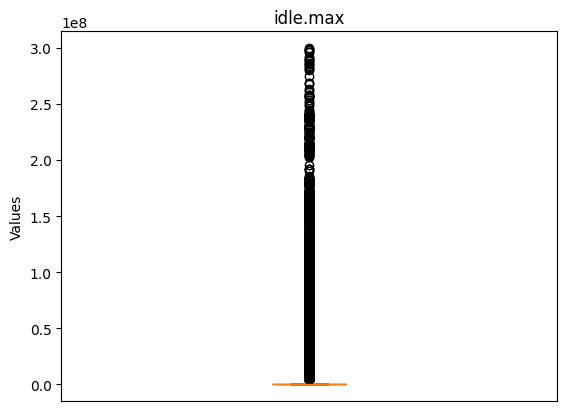

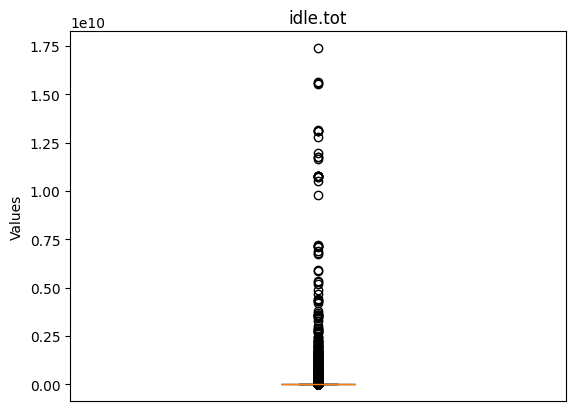

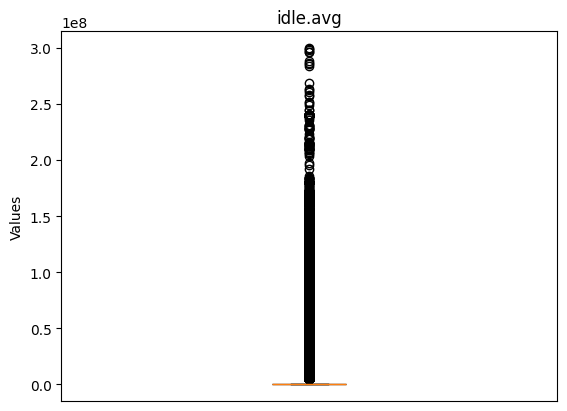

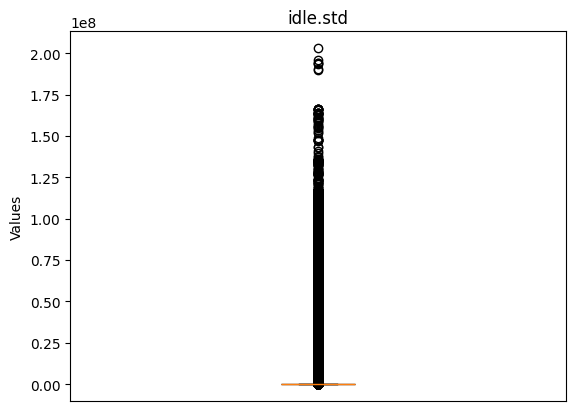

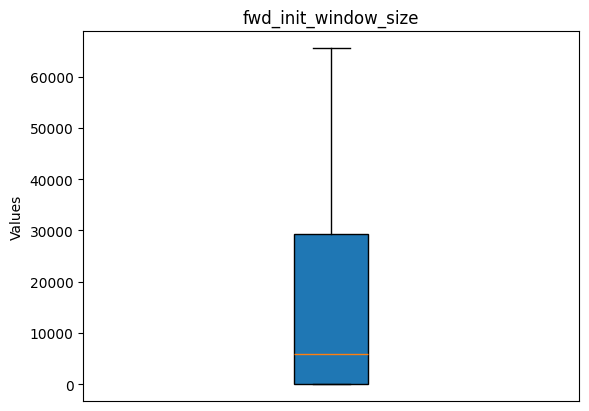

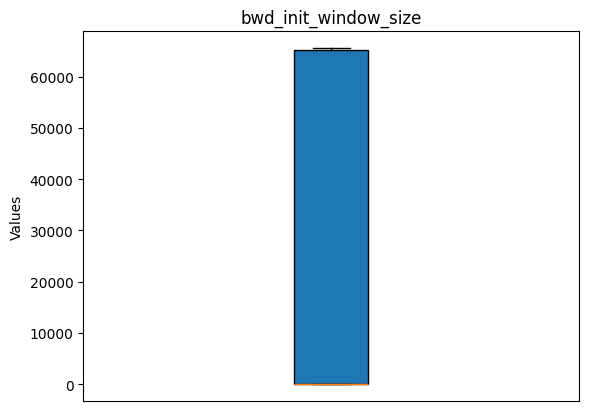

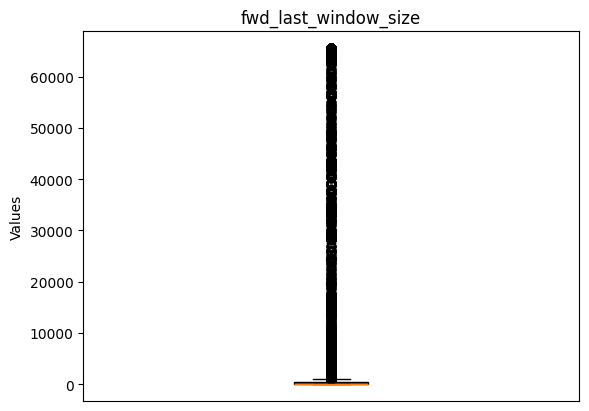

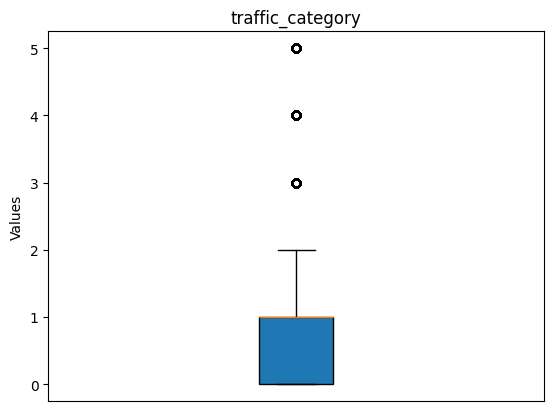

In [69]:
for col in df.columns:
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)
    plt.ylabel("Values")
    plt.xticks([])
    plt.show()